# Question 1:  Effect of Normalization, FeatureExtraction and Distance Metrics

##  1.1 Tasks

###  1.1.1 Train/Test Data Split

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [3]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [4]:
print(wine.shape)
wine[DLC].describe()
wine[DLC].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6    0.0  
1      9.5        6    0.0  
2     10.1        6    0.0  
3      9.9        6    0.0  
4      9.9        6    0.0

In [5]:
# classify color of wine with all features
X = wine[D].values
y = np.ravel(wine[[C]])
y_q = np.ravel(wine[[L]])

ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 
X_train, X_test, y_train_q, y_test_q = train_test_split(X, y_q, test_size=0.2, random_state = ran)

### 1.1.2 Normalization 

In [6]:
unnormalized_features = wine[DC]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(wine[DC])
normalized_features = pd.DataFrame(normalized_features, columns=DC)
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

#####       Pairplot for non-normalized Data

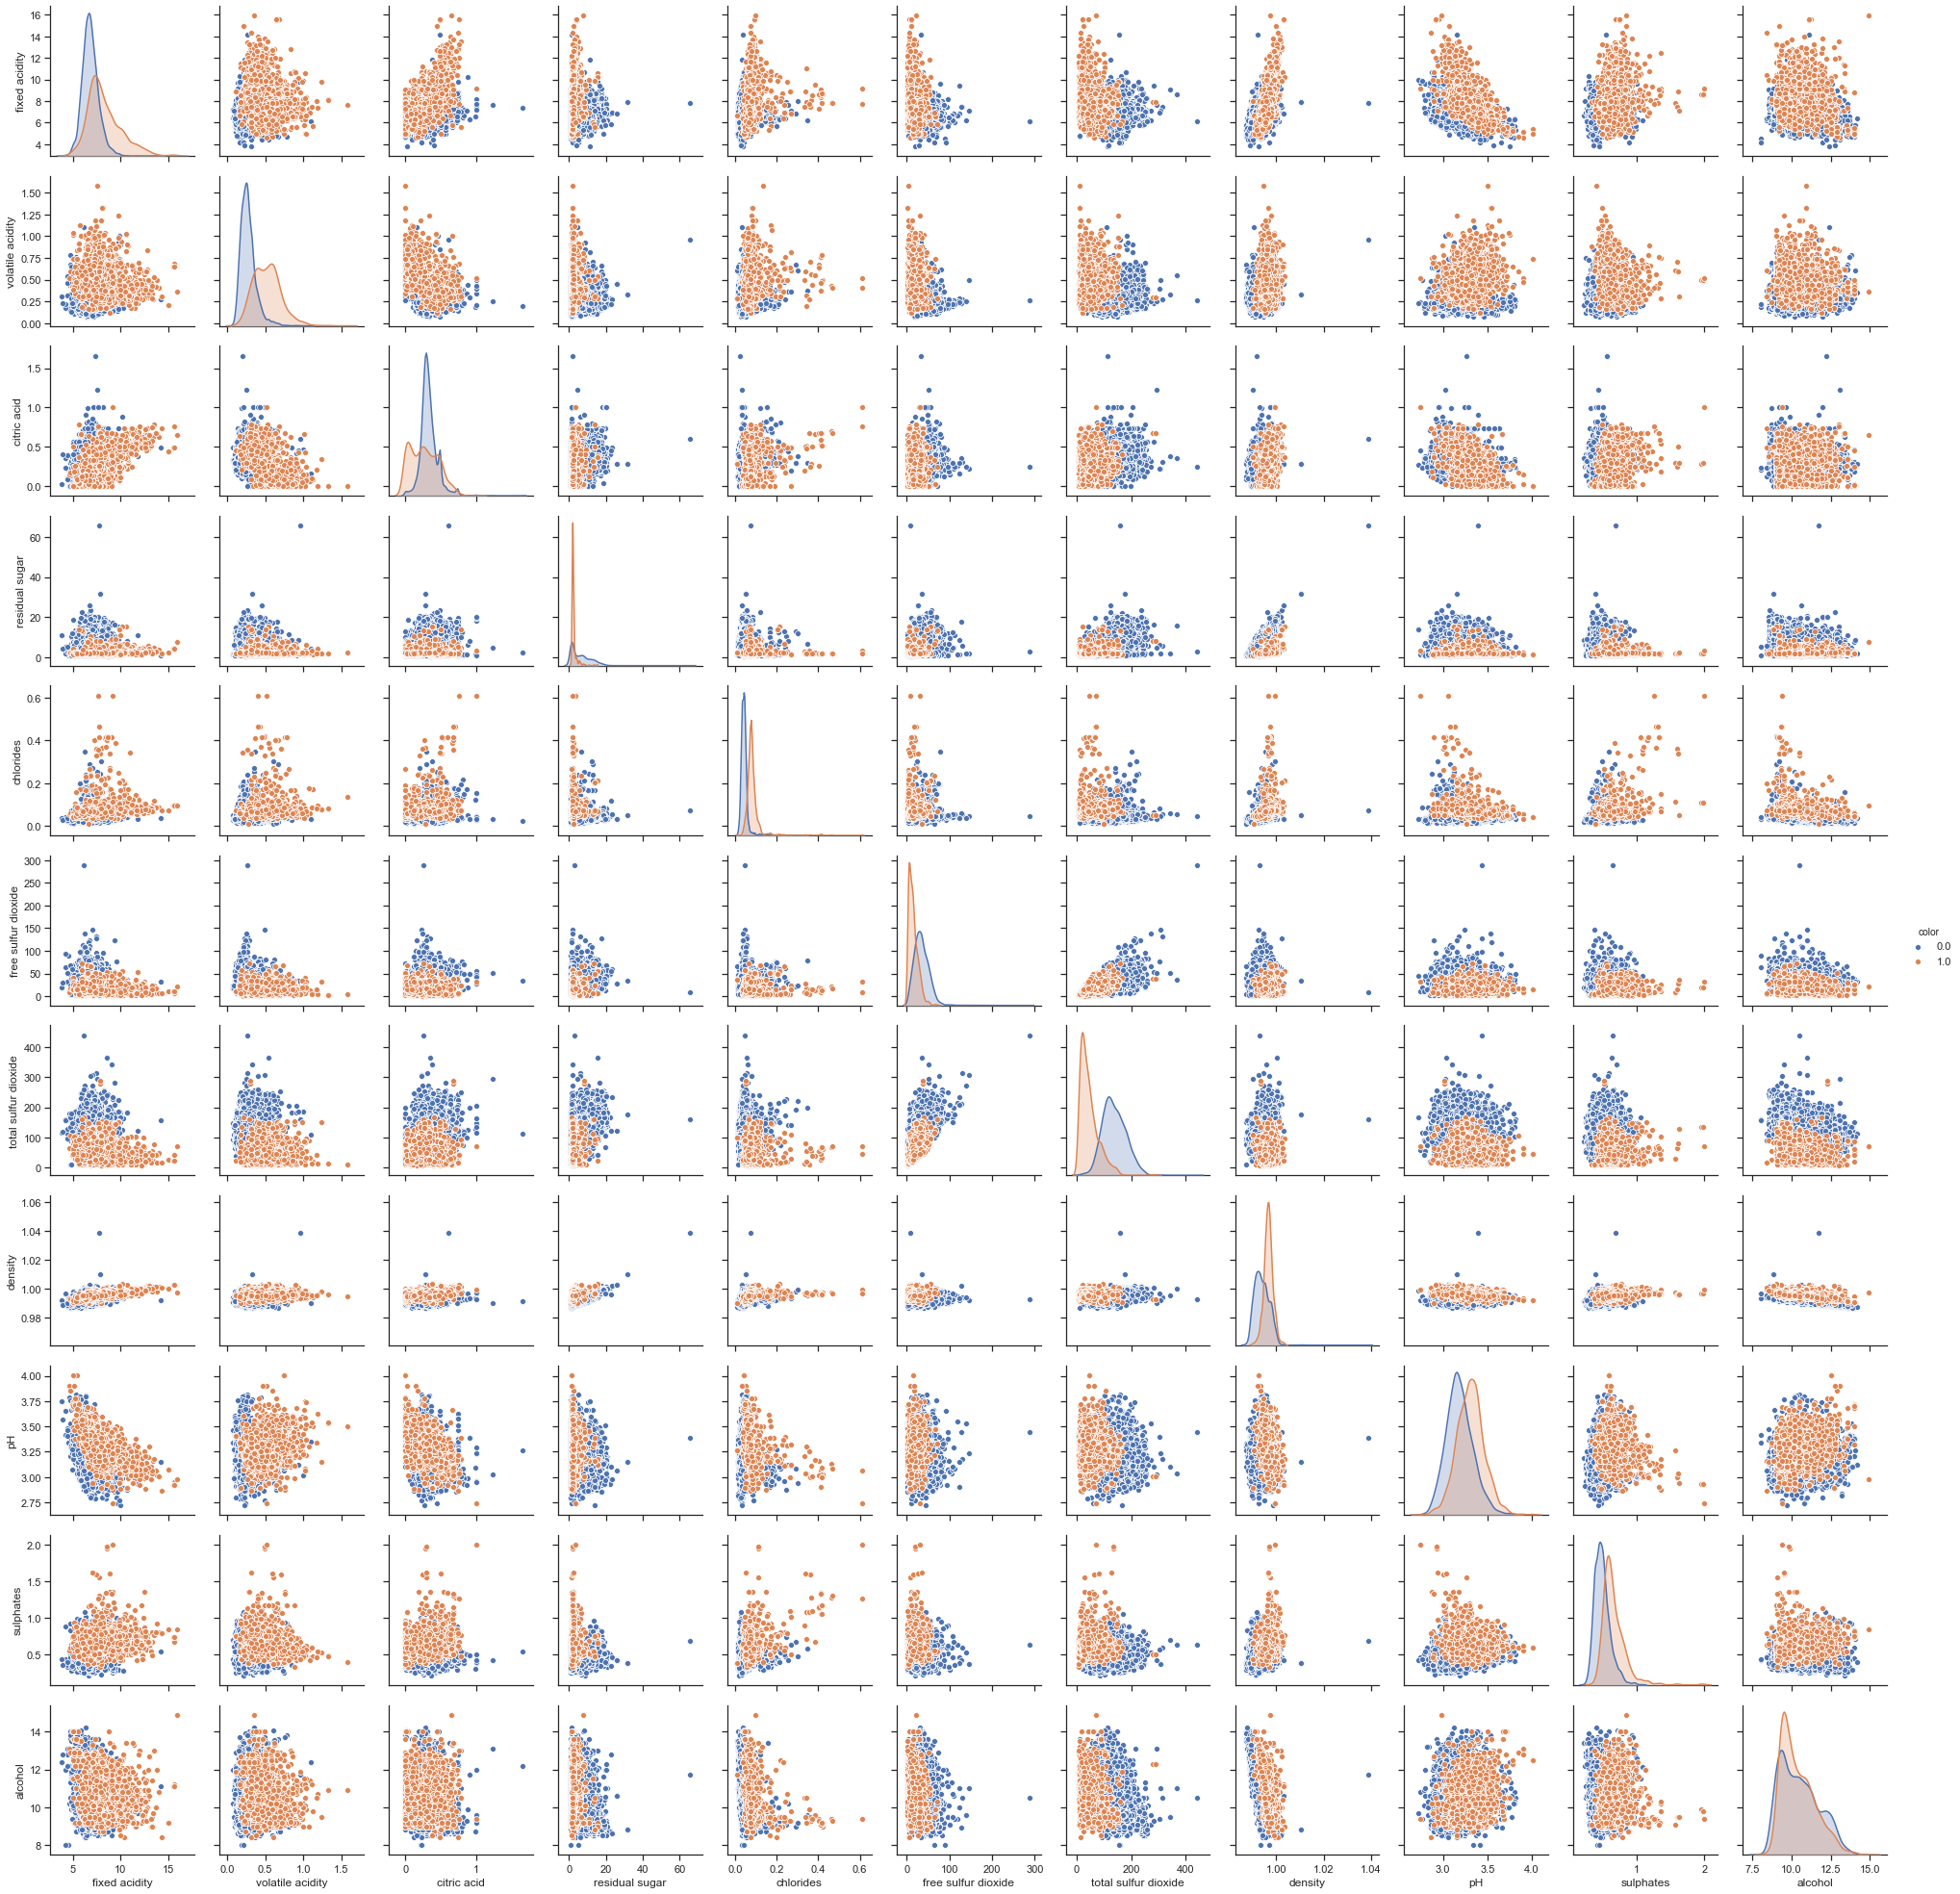

In [7]:
g = sns.pairplot(unnormalized_features, vars = unnormalized_features.columns[:-1], hue = 'color')

#####       Pairplot for normalized Data

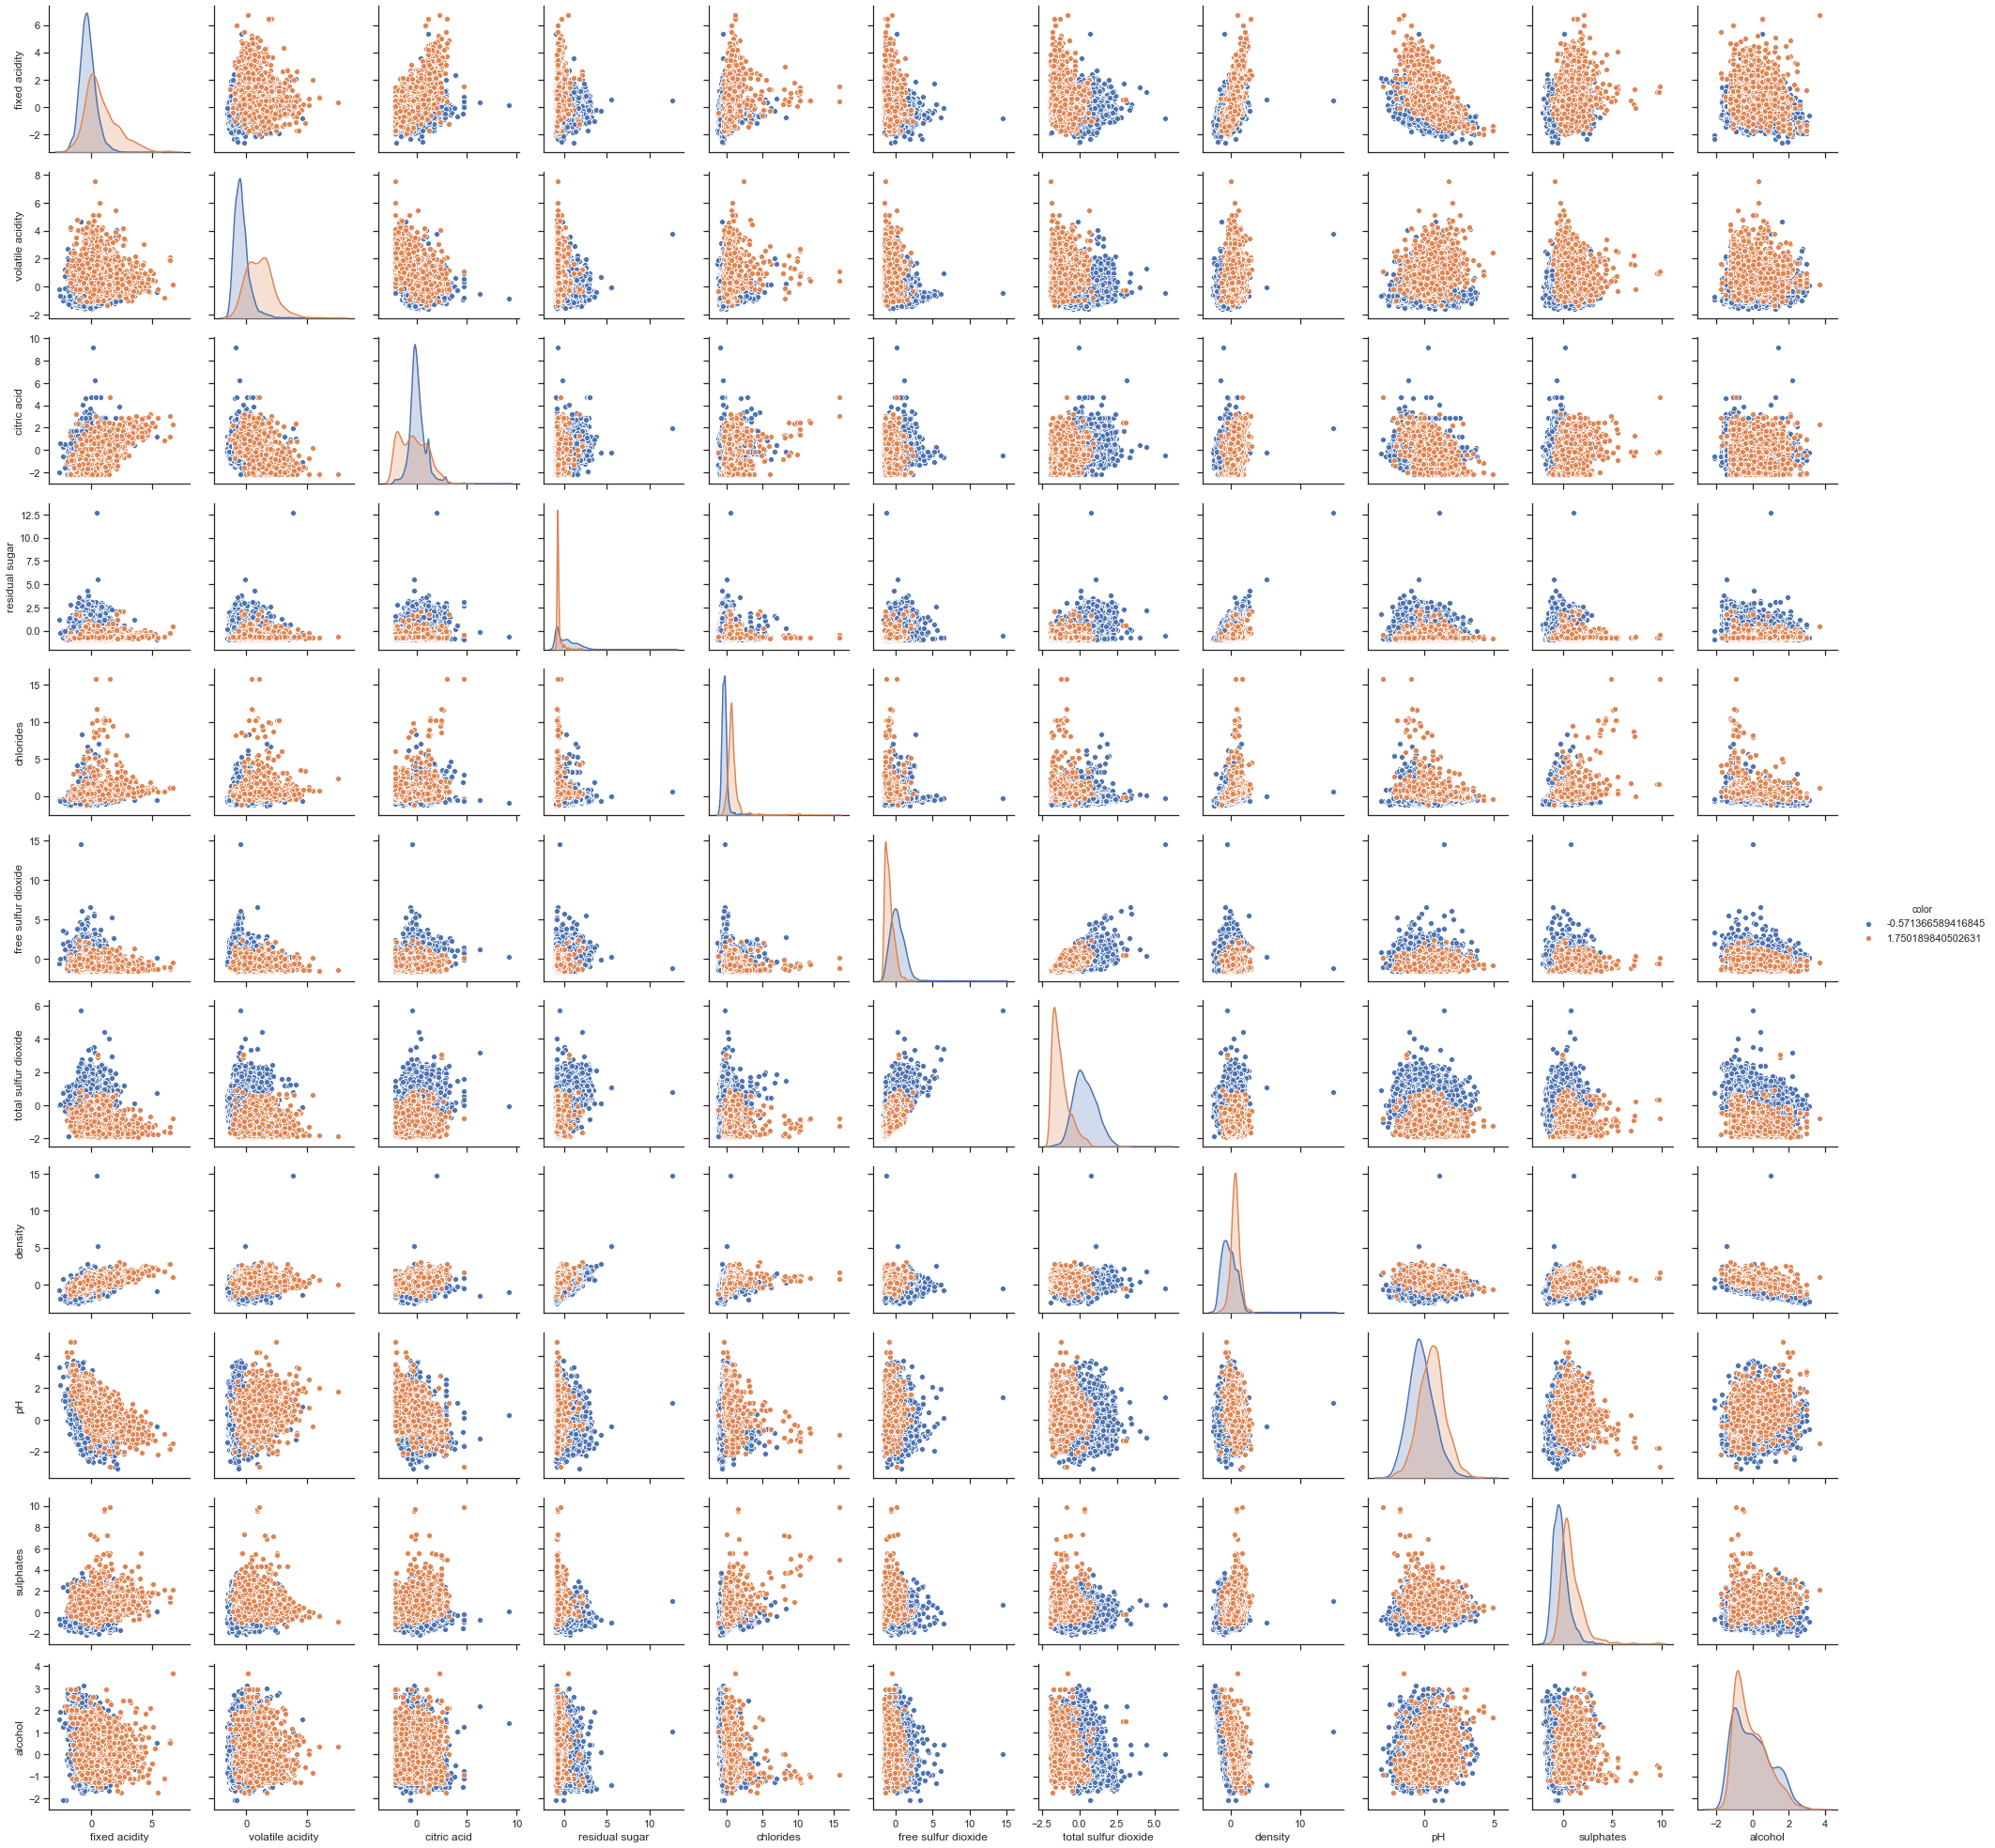

In [8]:
h = sns.pairplot(normalized_features, vars = normalized_features.columns[:-1], hue = 'color')

#### Comparing Pairplot for normalized and non- nonrmalized features
Following are the observations from the above pair plot:

the normalized plots are a bit more symmetric and not tend to look too elliptical compared to non-normalized plots which might be the result of bringing all the features to the same scale using normalization.<br><br>
Moreover, the normalized plots are Z-score normalized and hence they represent the variation of normalized variance among features, whereas the non-normalized plot show variation of features among each other. Hence, the non-normalized plots tend to look affected by the actual values (cause of different scales of each feature), and hence do not provide a clear picture of variations of variances amongst different features.

Z-score converts all features to a common scale with an average of zero and standard deviation of one. The average of zero means that it avoids introducing aggregation distortions stemming from differences in feature means.


As different features have different scales, normalizing these features by z-score would make the plots normalized, the plots would still show the relationship between two variables maintaining the dispersion between features but would be less affected by the difference in scales of features.

### 1.1.3 Classification : Color

##### KNN Classification for wine color on normalized features

In [9]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transformed, y_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(X_train_transformed, y_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(X_train_transformed, y_train)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[1]] = accscore 

acc.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.971031          0.972231          0.975554
std     0.140134          0.140306          0.140783
min     0.000000          0.000000          0.000000
25%     0.990000          0.990769          0.994615
50%     0.990769          0.991538          0.995385
75%     0.990769          0.992308          0.996154
max     0.995385          0.996154          0.996923

Text(0, 0.5, 'Accuracy(%)')

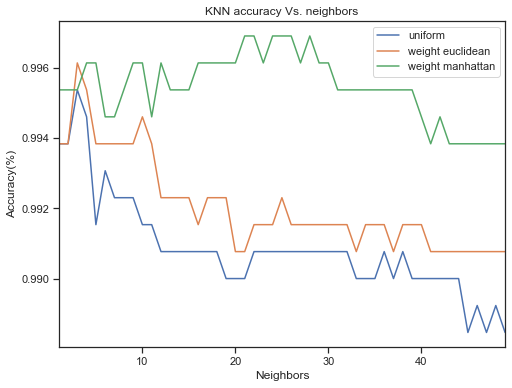

In [10]:
graph = acc[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

##### KNN Classification for wine quality on normalized features

In [11]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_q=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transformed, y_train_q)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_q.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(X_train_transformed, y_train_q)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_q.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(X_train_transformed, y_train_q)
    y_pred = neigh.predict(X_test_transformed)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_q.at[k,col_names[1]] = accscore 

acc_q.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.551954          0.665769          0.670262
std     0.080610          0.096883          0.097561
min     0.000000          0.000000          0.000000
25%     0.556346          0.676923          0.684038
50%     0.559615          0.683077          0.689231
75%     0.566923          0.686154          0.690769
max     0.628462          0.690000          0.694615

Text(0, 0.5, 'Accuracy(%)')

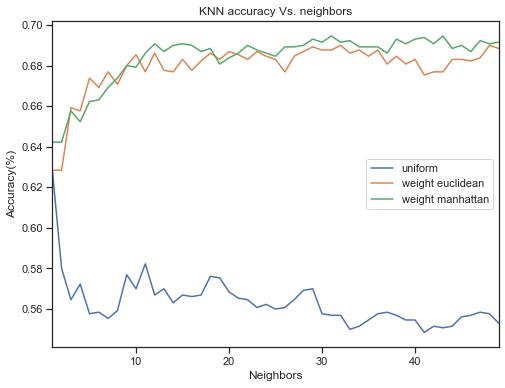

In [12]:
graph = acc_q[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

### 1.1.4 Features Selection

##### Using correlation matrix for selecting the Features for color target

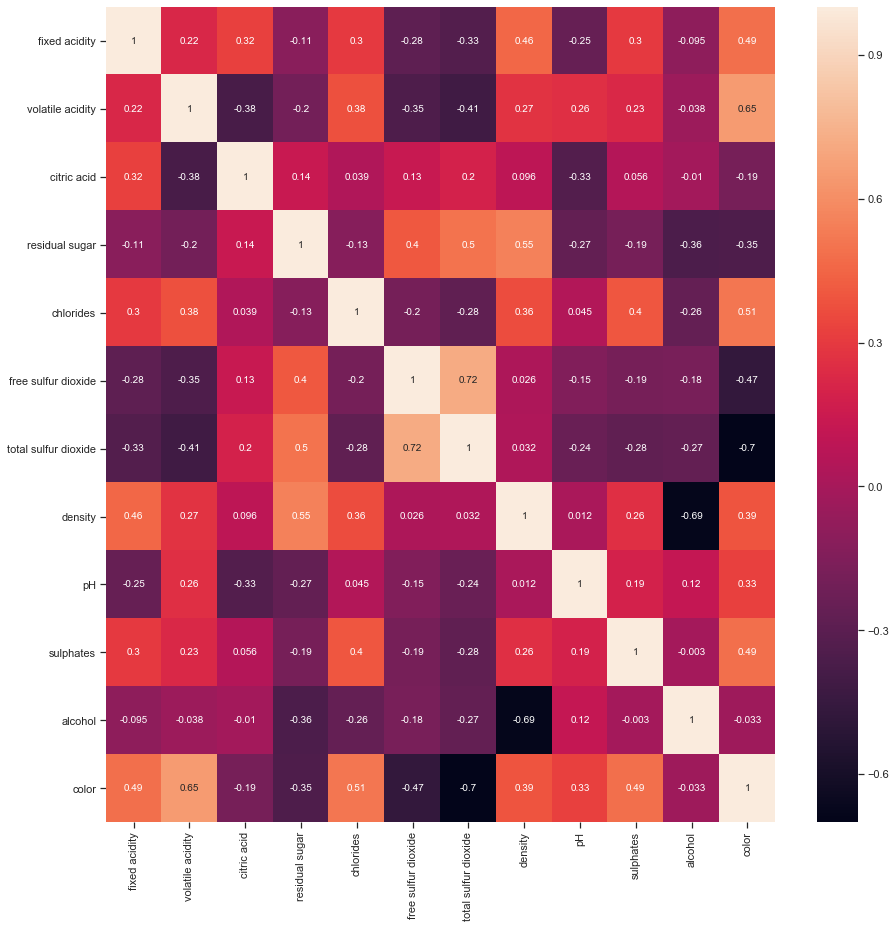

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(wine[DC].corr(),annot = True)

##### 1.1.4.1 KNN Classification for wine color on selected Features

In [14]:
# Features are selected based on the descending correlation between the feature and color target variable from the correlation matrix 
sel = ['sulphates', 'total sulfur dioxide','volatile acidity', 'chlorides']
X_sel_c = wine[sel]
X_sel_train_c, X_sel_test_c, y_sel_train_c, y_sel_test_c = train_test_split(X_sel_c,y, test_size=0.2, random_state = ran)
scalar = StandardScaler(copy=False, with_mean=True, with_std=True)
X_sel_train_scaled_c = scalar.fit_transform(X_sel_train_c)
X_sel_test_scaled_c = scalar.transform(X_sel_test_c)

n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_c_sel=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_sel_train_scaled_c, y_sel_train_c)
    y_pred = neigh.predict(X_sel_test_scaled_c)
    accscore = accuracy_score(y_sel_test_c, y_pred)
    acc_c_sel.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(X_sel_train_scaled_c, y_sel_train_c)
    y_pred = neigh.predict(X_sel_test_scaled_c)
    accscore = accuracy_score(y_sel_test_c, y_pred)
    acc_c_sel.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(X_sel_train_scaled_c, y_sel_train_c)
    y_pred = neigh.predict(X_sel_test_scaled_c)
    accscore = accuracy_score(y_sel_test_c, y_pred)
    acc_c_sel.at[k,col_names[1]] = accscore 

acc_c_sel.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.967477          0.968569          0.968108
std     0.139617          0.139773          0.139708
min     0.000000          0.000000          0.000000
25%     0.986346          0.987692          0.987692
50%     0.986923          0.988462          0.987692
75%     0.987692          0.988462          0.987692
max     0.990000          0.990000          0.990769

Text(0, 0.5, 'Accuracy(%)')

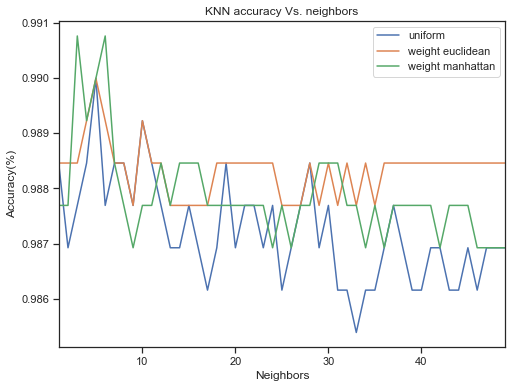

In [15]:
graph = acc_c_sel[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

##### Using correlation matrix for selecting the Features for wine quality target

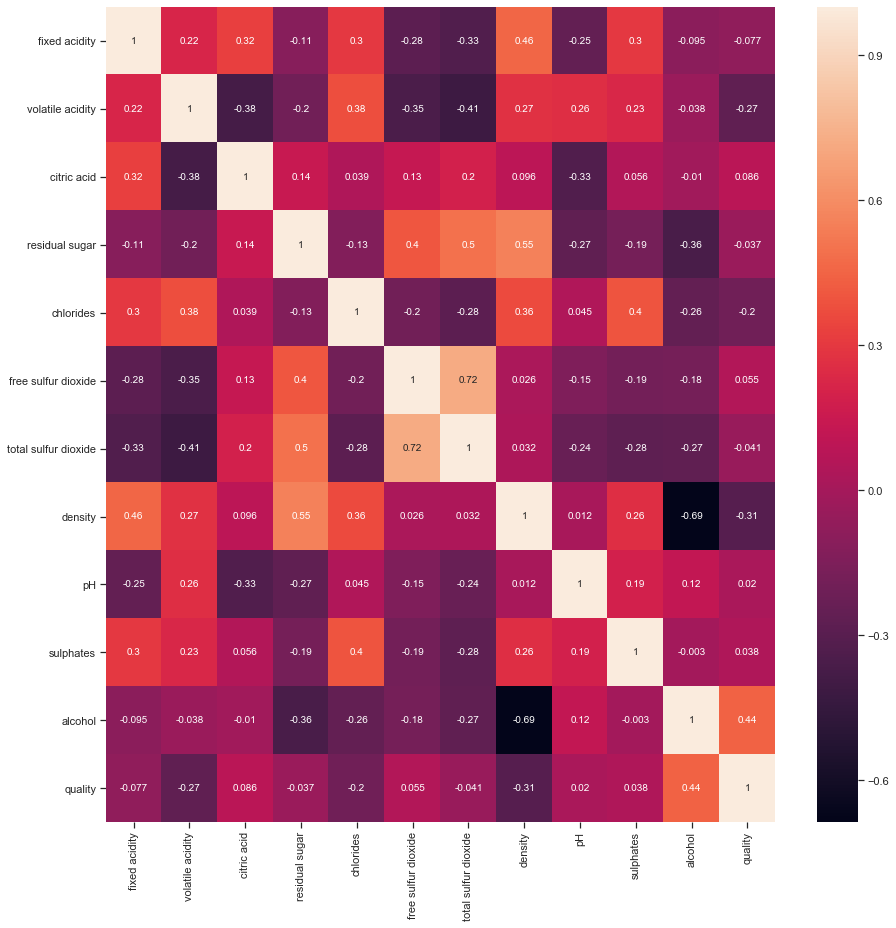

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(wine[DL].corr(),annot = True)

##### 1.1.4.2 KNN Classification for wine quality on selected Features

In [17]:
# Features are selected based on the descending correlation between the feature and quality target variable from the correlation matrix 

sel = ['alcohol','density', 'volatile acidity','chlorides']
X_sel_q = wine[sel]
X_sel_train_q, X_sel_test_q, y_sel_train_q, y_sel_test_q = train_test_split(X_sel_q,y_q, test_size=0.2, random_state = ran)
scalar = StandardScaler(copy=False, with_mean=True, with_std=True)
X_sel_train_scaled_q = scalar.fit_transform(X_sel_train_q)
X_sel_test_scaled_q = scalar.transform(X_sel_test_q)

n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_q_sel=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_sel_train_scaled_q, y_sel_train_q)
    y_pred = neigh.predict(X_sel_test_scaled_q)
    accscore = accuracy_score(y_sel_test_q, y_pred)
    acc_q_sel.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(X_sel_train_scaled_q, y_sel_train_q)
    y_pred = neigh.predict(X_sel_test_scaled_q)
    accscore = accuracy_score(y_sel_test_q, y_pred)
    acc_q_sel.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(X_sel_train_scaled_q, y_sel_train_q)
    y_pred = neigh.predict(X_sel_test_scaled_q)
    accscore = accuracy_score(y_sel_test_q, y_pred)
    acc_q_sel.at[k,col_names[1]] = accscore 

acc_q_sel.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.536169          0.644831          0.648877
std     0.078055          0.095380          0.095834
min     0.000000          0.000000          0.000000
25%     0.540385          0.655000          0.663077
50%     0.547692          0.667308          0.668462
75%     0.552115          0.670000          0.673654
max     0.591538          0.678462          0.681538

Text(0, 0.5, 'Accuracy(%)')

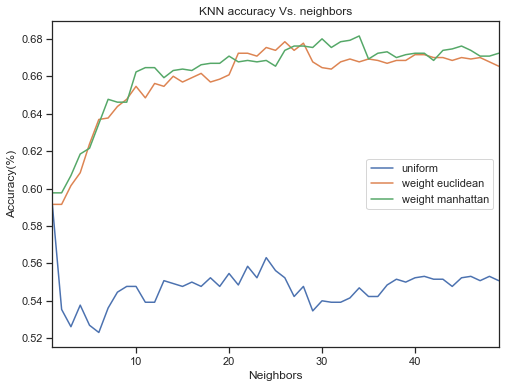

In [18]:
graph = acc_q_sel[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

### 1.1.5 Feature Extraction

#### 1.1.5.1 PCA : Color

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components = 5, random_state = 42)
model = pca.fit_transform(X_train_transformed)

In [21]:
projected_data = pca.transform(X_test_transformed)

##### KNN Classification for wine color on PCA transformed data with 5 Principal Components

In [22]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray_PCA = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_PCA=pd.DataFrame(accarray_PCA, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(model, y_train)
    y_pred = neigh.predict(projected_data)
    accscore = accuracy_score(y_test, y_pred)
    acc_PCA.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(model, y_train)
    y_pred = neigh.predict(projected_data)
    accscore = accuracy_score(y_test, y_pred)
    acc_PCA.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(model, y_train)
    y_pred = neigh.predict(projected_data)
    accscore = accuracy_score(y_test, y_pred)
    acc_PCA.at[k,col_names[1]] = accscore 

acc_PCA.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.967015          0.969000          0.968862
std     0.139557          0.139838          0.139817
min     0.000000          0.000000          0.000000
25%     0.986154          0.987692          0.987885
50%     0.986923          0.988462          0.988462
75%     0.988269          0.989231          0.988462
max     0.991538          0.992308          0.991538

Text(0, 0.5, 'Accuracy(%)')

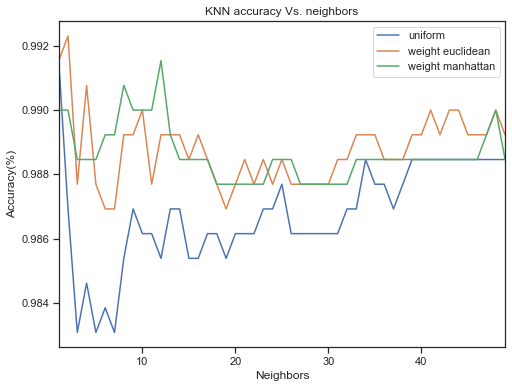

In [23]:
graph = acc_PCA[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

#### 1.1.5.1 PCA : Quality

##### KNN Classification for wine quality on PCA transformed data with 5 Principal Components

In [24]:
pca = PCA(n_components = 5, random_state = 42)
model = pca.fit_transform(X_train_transformed)

In [25]:
projected_data = pca.transform(X_test_transformed)

In [26]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray_PCA = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_PCA=pd.DataFrame(accarray_PCA, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(model, y_train_q)
    y_pred = neigh.predict(projected_data)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_PCA.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(model, y_train_q)
    y_pred = neigh.predict(projected_data)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_PCA.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(model, y_train_q)
    y_pred = neigh.predict(projected_data)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_PCA.at[k,col_names[1]] = accscore 

acc_PCA.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.515123          0.640246          0.638677
std     0.076291          0.092884          0.092754
min     0.000000          0.000000          0.000000
25%     0.517115          0.649231          0.650192
50%     0.520769          0.654615          0.653846
75%     0.528846          0.660577          0.657500
max     0.626923          0.666923          0.663077

Text(0, 0.5, 'Accuracy(%)')

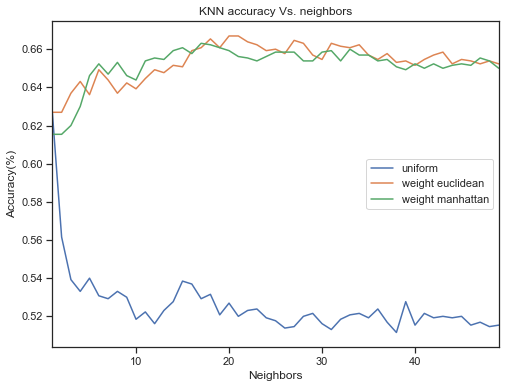

In [27]:
graph = acc_PCA[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

#### 1.1.5.2 LDA : Color

##### KNN Classification for wine color on LDA transformed data with 1 direction

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components = 5)
LDA_data = LDA.fit_transform(X_train_transformed, y_train)

C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [29]:
projected_LDA = LDA.transform(X_test_transformed)

In [30]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray_LDA = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_LDA=pd.DataFrame(accarray_LDA, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(LDA_data, y_train)
    y_pred = neigh.predict(projected_LDA)
    accscore = accuracy_score(y_test, y_pred)
    acc_LDA.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(LDA_data, y_train)
    y_pred = neigh.predict(projected_LDA)
    accscore = accuracy_score(y_test, y_pred)
    acc_LDA.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(LDA_data, y_train)
    y_pred = neigh.predict(projected_LDA)
    accscore = accuracy_score(y_test, y_pred)
    acc_LDA.at[k,col_names[1]] = accscore 

acc_LDA.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.974077          0.972769          0.972769
std     0.140568          0.140378          0.140378
min     0.000000          0.000000          0.000000
25%     0.993846          0.992308          0.992308
50%     0.993846          0.992308          0.992308
75%     0.994615          0.993077          0.993077
max     0.994615          0.993077          0.993077

Text(0, 0.5, 'Accuracy(%)')

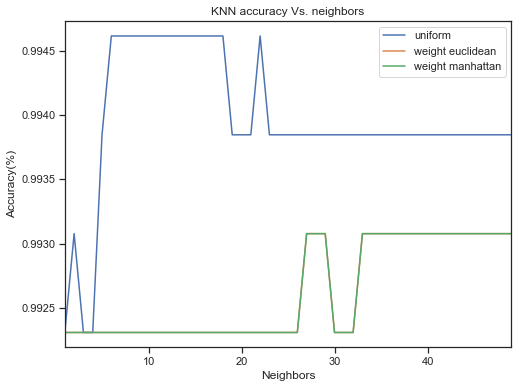

In [31]:
graph = acc_LDA[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

#### 1.1.5.2 LDA : Quality

##### KNN Classification for wine quality on LDA transformed data with 5 direction

In [32]:
LDA = LinearDiscriminantAnalysis(n_components = 5)
LDA_data = LDA.fit_transform(X_train_transformed, y_train_q)

In [33]:
projected_LDA = LDA.transform(X_test_transformed)

In [34]:
n_neighborslist = list(range(1,50))
col_names=['uniform', 'weight euclidean', 'weight manhattan']
accarray_LDA = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_LDA=pd.DataFrame(accarray_LDA, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(LDA_data, y_train_q)
    y_pred = neigh.predict(projected_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_LDA.at[k,col_names[0]] = accscore
    
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 1)
    neigh.fit(LDA_data, y_train_q)
    y_pred = neigh.predict(projected_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_LDA.at[k,col_names[2]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance', p = 2)
    neigh.fit(LDA_data, y_train_q)
    y_pred = neigh.predict(projected_LDA)
    accscore = accuracy_score(y_test_q, y_pred)
    acc_LDA.at[k,col_names[1]] = accscore 

acc_LDA.describe()

uniform  weight euclidean  weight manhattan
count  50.000000         50.000000         50.000000
mean    0.540077          0.648523          0.650954
std     0.078624          0.094883          0.095128
min     0.000000          0.000000          0.000000
25%     0.545577          0.657885          0.658269
50%     0.550769          0.668462          0.668462
75%     0.555385          0.670000          0.673654
max     0.604615          0.674615          0.682308

Text(0, 0.5, 'Accuracy(%)')

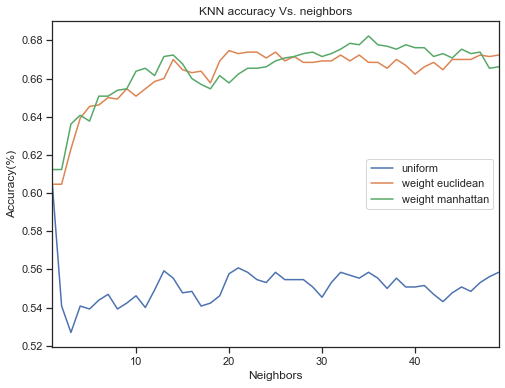

In [35]:
graph = acc_LDA[1:].plot.line(figsize = (8,6), title = 'KNN accuracy Vs. neighbors')
graph.set_xlabel("Neighbors")
graph.set_ylabel("Accuracy(%)")

##### Comparing PCA and LDA for Color
Comparing the KNN classification accuracy on PCA and LDA features, maximum accuracy achieved using LDA(n_components = 1) features for wine color target variable is 99.46% which is greater than the accuracy obtained using PCA features(n_components = 5) of 99.23%. Thus can conclude that LDA works better compared to PCA for wine color target variable.

##### Comparing PCA and LDA for Quality
Similarly, when analysing the KNN classification accuracy on PCA and LDA features, it was observed that maximum accuracy achieved using LDA with n_components = 5 for quality target variable is 68.23% which is greater than the accuracy obtained using PCA features (n_components = 5) of 66.69% respectively. Thus can conclude that LDA works better compared to PCA in this case.

### 1.1.6 Analysis and Discussion

#### 1.1.6.1 K-Plots
All such k-plots are plotted above

#### 1.1.6.2 Features
From the correlation heatmap plotted for feature selection methods and by looking at the pair plots, we can say that following features are highly associated:
1. Free sulpher dioxide and total sulfur di oxide share have a correlation of .72 and share 51.84% of variance.<br>
2. Density and alcohol have a correlation of .69 and share a variance of 47.61% of variance.<br>
3. Residual sugar and density share a high correlation of .55 and hence share 30.25 % of variance. <br>
4. Density and fixed acidity share a correlation of 0.46 and hence share a medium variance of 21.16% of variance.

#### 1.1.6.3 Selected Features:
1. The best accuracy achieved on wine color using KNN is 99.61% , where as best accuracy achieved on color using selected features as 'total sulpher dioxide', 'volatile acidity', 'chlorides' and 'sulphates' is 99.07%.<br>
2. The best accuracy achieved on wine quality using KNN is 69.46% , where as best accuracy achieved on quality using seleceted features as 'alcohol', 'density','volatile acidity' and 'chlorides'  is 68.15%.<br>

It can be concluded that better accuracy is achieved using the full features instead of a selection of features as maximum variance achieved using selected features must be less than the maximum variance achieved using all the given features.<br>

1. The best performance of PCA(n_components = 5) on wine color is achieved as 99.23%, whereas best performance of PCA(with 5 features) on wine quality as 66.69 %<br>
2. Best performance of LDA (1 component) for wine color is achieved as 99.46% and best performance of LDA (5 component) for wine quality is achieved as 68.23% <br>

Thus, we can say that PCA(5 components) and LDA(1 component) performed better for wine color prediction compared to four features selected using the correlation among features and wine colors. Whereas, In the case of wine quality prediction, four selected features based model (using correlation among features and wine quality), performed better than PCA(5 components) based model, but could not perform better than LDA(5 components).

#### 1.1.6.4 PCA vs. LDA:
1. From the above k-plots of KNN classification accuracy for different features from the dataset, PCA and LDA, it can be depicted that using PCA or LDA for n_components = 5 does not result into better accuracy than the accuracy obtained using given dataset features.<br><br>

2. Comparing the KNN classification accuracy on PCA and LDA features, maximum accuracy achieved using LDA features(n_components = 1) for color and quality (n_components = 5) target variables are 99.46% and 68.23% which is greater than the accuracy obtained using PCA features(n_components = 5) of 99.23% and 66.69% respectively. Thus can conclude that LDA works better compared to PCA for both of the target variables.<br><br>

3. Normalization does affect the performance of PCA. In PCA we are interested in the components that maximize the variance. If one component (e.g. density) varies less than another (e.g. total sulfur dioxide) because of their respective scales (g/cm3 vs. ppm), PCA might determine that the direction of maximal variance more closely corresponds with the ‘density’ axis, if those features are not scaled. Which would be incorrect. While process of normalization brings all the features to the same scale without affecting the variance described by each feature giving the principal components in the direction of maximum variance.<br>[reference : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html]
<br><br>
However, Normalization does not affect the LDA. LDA is the classification technique using target variable to separate variables in the lower dimension. It tries to minimise the variance within group and maximise the separation between the group which is not affected by the normalization.<br>
[reference : https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step]<br>


#### 1.1.6.5 Plots
##### Projection of first two components of PCA transformed data for Color

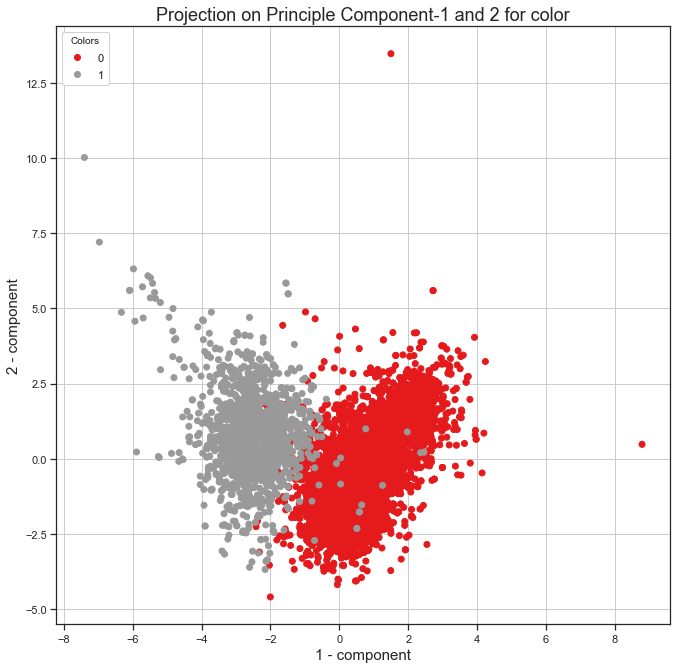

In [36]:
normalized_feature = scaler.fit_transform(wine[D])
pca = PCA(n_components = 2, random_state = 42)
model = pca.fit_transform(normalized_feature)
model_pca_color = pd.DataFrame(model, columns = ['PC1', 'PC2'])

fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(model_pca_color.iloc[:,0], model_pca_color.iloc[:,1], c = wine[C], cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Colors")
axs.add_artist(legend1)
axs.set_xlabel(str(1) + ' - component', fontsize = 15)
axs.set_ylabel(str(2) + ' - component', fontsize = 15)
axs.set_title("Projection on Principle Component-1 and 2 for color", fontsize = 18)
axs.grid()

##### Projection of first two components of PCA transformed data for Quality

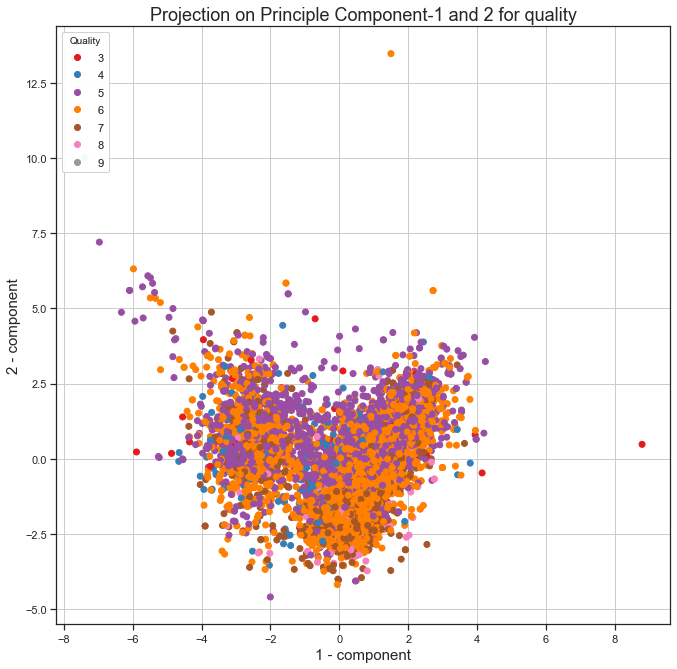

In [37]:
pca = PCA(n_components = 2, random_state = 42)
model = pca.fit_transform(normalized_feature)
model_pca_quality = pd.DataFrame(model, columns = ['PC1', 'PC2'])

fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(model_pca_quality.iloc[:,0], model_pca_quality.iloc[:,1], c = wine[L], cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Quality")
axs.add_artist(legend1)
axs.set_xlabel(str(1) + ' - component', fontsize = 15)
axs.set_ylabel(str(2) + ' - component', fontsize = 15)
axs.set_title("Projection on Principle Component-1 and 2 for quality", fontsize = 18)
axs.grid()

##### Projection of first component of LDA transformed data for Color

C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


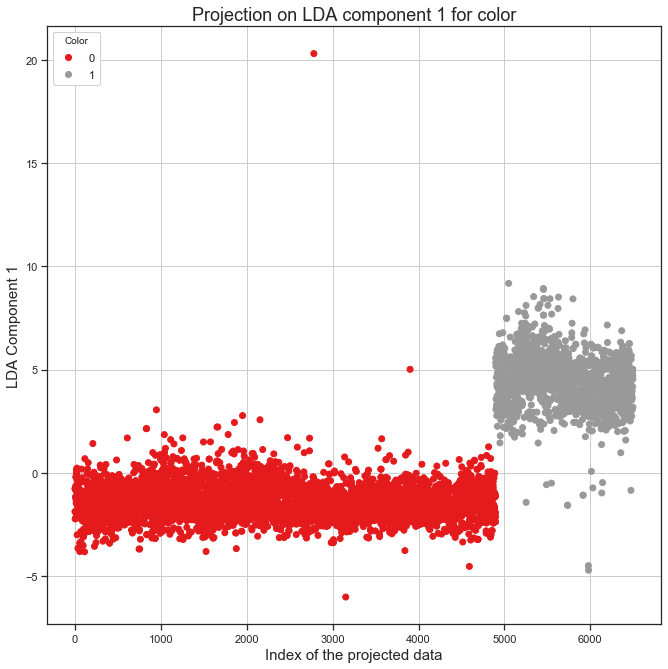

In [38]:
LDA = LinearDiscriminantAnalysis(n_components = 2)
LDA_data = LDA.fit_transform(normalized_feature, wine[C])
LDA_data_color = pd.DataFrame(LDA_data, columns = ['Direction1'])

fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(np.arange(len(LDA_data_color)),LDA_data_color.iloc[:,0], c = wine[C], cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Color")
axs.add_artist(legend1)
axs.set_xlabel("Index of the projected data", fontsize = 15)
axs.set_ylabel('LDA Component 1', fontsize = 15)
axs.set_title("Projection on LDA component 1 for color", fontsize = 18)
axs.grid()

##### Projection of first two components of LDA transformed data for Quality

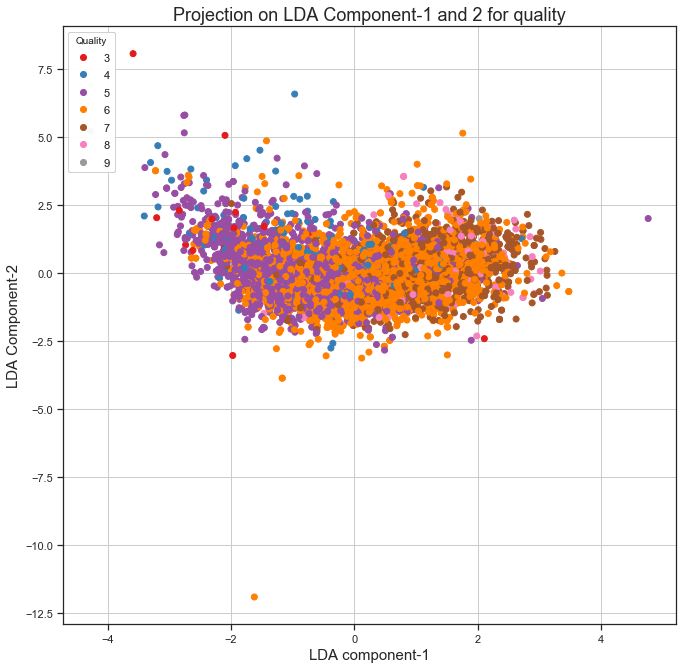

In [39]:
LDA = LinearDiscriminantAnalysis(n_components = 2)
LDA_data = LDA.fit_transform(normalized_feature, wine[L])
LDA_data_quality = pd.DataFrame(LDA_data, columns = ['Direction1','Direction2'])

fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(LDA_data_quality.iloc[:,0],LDA_data_quality.iloc[:,1], c = wine[L], cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Quality")
axs.add_artist(legend1)
axs.set_xlabel("LDA component-1", fontsize = 15)
axs.set_ylabel("LDA Component-2", fontsize = 15)
axs.set_title("Projection on LDA Component-1 and 2 for quality", fontsize = 18)
axs.grid()

By looking at the above plots and comparing these plots with pairplots plotted above, we have the following observation :
1. PCA and LDA plots are more informative compared to pairplots, and it is easier to comprehend data on the projected axis of PCA and LDAs.
2. In PCA, data is projected into principal axis which are orthogonal to each other (thus having a correlation = 0), whereas in pair plots the feature axis might share some correlation. This independence of principal components (among each other) helps in better visualization of data, as can be seen for wine color data projection on first two principal components.
3. The basis for LDA is to maximize separation among different classes while minimizing variance within all classes, thus it is expected from LDA to perform better for separating target variables. This can be seen from the plots above, The projection of wine quality data on LDA components gives good information about data separability compared to pair plots.

To conclude, it can be said, the projection of data on PCA and LDA components is better representative of separation of classes, as these components are formed using all the data features to maintain maximum data variance and to maximize separation between classes while minimizing variance shared among all classes respectively. Thus a few components obtained using PCA and LDA(few plots using few components) might summarize the dataset well compared to same number of features used directly from dataset. 


# Question 2: Linear Dimensionality Reduction

## 2.1 Dataset

In [40]:
variables = []
for i in range(1,785):
    variables.append('fea.' + str(i))
numbers = pd.read_csv("DataB.csv", usecols = variables)
targets = pd.read_csv("DataB.csv", usecols = ['gnd'])

In [41]:
X = numbers.values
y = targets.values

In [42]:
numbers.describe()

fea.1        fea.2        fea.3        fea.4        fea.5  \
count  2066.000000  2066.000000  2066.000000  2066.000000  2066.000000   
mean      2.508228     2.547435     2.460794     2.496612     2.472894   
std       1.477246     1.502839     1.499851     1.497128     1.509451   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       3.000000     3.000000     2.000000     3.000000     2.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

             fea.6        fea.7        fea.8        fea.9       fea.10  ...  \
count  2066.000000  2066.000000  2066.000000  2066.000000  2066.000000  ...   
mean      2.490319     2.486447     2.512585     2.522265     2.482091  ...   
std       1.498071     1.501270     1.524326     1.502456     1.509909  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       1.000000     1.000000     1.000000     1.000000     1.000000  ...   
50%       2.000000     3.000000     3.000000     3.000000     2.000000  ...   
75%       4.000000     4.000000     4.000000     4.000000     4.000000  ...   
max       5.000000     5.000000     5.000000     5.000000     5.000000  ...   

           fea.775      fea.776      fea.777      fea.778      fea.779  \
count  2066.000000  2066.000000  2066.000000  2066.000000  2066.000000   
mean      2.517909     2.469506     2.522749     2.486447     2.449661   
std       1.513113     1.488060     1.515606     1.506422     1.511740   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       3.000000     2.000000     3.000000     3.000000     2.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

           fea.780      fea.781      fea.782      fea.783      fea.784  
count  2066.000000  2066.000000  2066.000000  2066.000000  2066.000000  
mean      2.498064     2.525653     2.542110     2.400290     2.519361  
std       1.496160     1.511079     1.491353     1.527783     1.504107  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.000000     1.000000     1.000000     1.000000     1.000000  
50%       3.000000     3.000000     3.000000     2.000000     2.000000  
75%       4.000000     4.000000     4.000000     4.000000     4.000000  
max       5.000000     5.000000     5.000000     5.000000     5.000000  

[8 rows x 784 columns]

## 2.2 Principal Component Analysis (PCA)

### 2.2.1 Practical Questions

#### 1) In PCA, compute the eigenvectors and eigenvalues. Plot the scree plot and visually discuss which cut-off is good.

In [43]:
import scipy.linalg as la
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [45]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.00197863  0.00493308 -0.00037529 ...  0.00013358 -0.00062295
  -0.00157864]
 [-0.00151307 -0.00640373  0.00258725 ... -0.00274212 -0.00837347
   0.0063992 ]
 [ 0.00049178 -0.00156563 -0.00372451 ... -0.00445827  0.00683485
  -0.00181313]
 ...
 [ 0.0001125   0.00300533 -0.00335936 ... -0.00245866 -0.00039547
   0.00083265]
 [ 0.00132315  0.00947149  0.00553066 ...  0.01026383 -0.01070597
   0.01537859]
 [-0.00591181  0.00287621  0.00624184 ... -0.00383851 -0.00246361
   0.00327846]]

Eigenvalues 
[5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.01821733e+00 6.72923900e+00
 6.17171361e+00 6.03035494e+00 5.97218819e+00 5.74588510e+00
 5.56641979e+00 5.34085526e+00 5.30999748e+00 5.07244463e+00
 4.90219996e+00 4.74032764e+00 4.46040954e+00 4.43875834e+00
 4.37522974e+00 4.24991493e+00 4.19736144e+00 4.13191

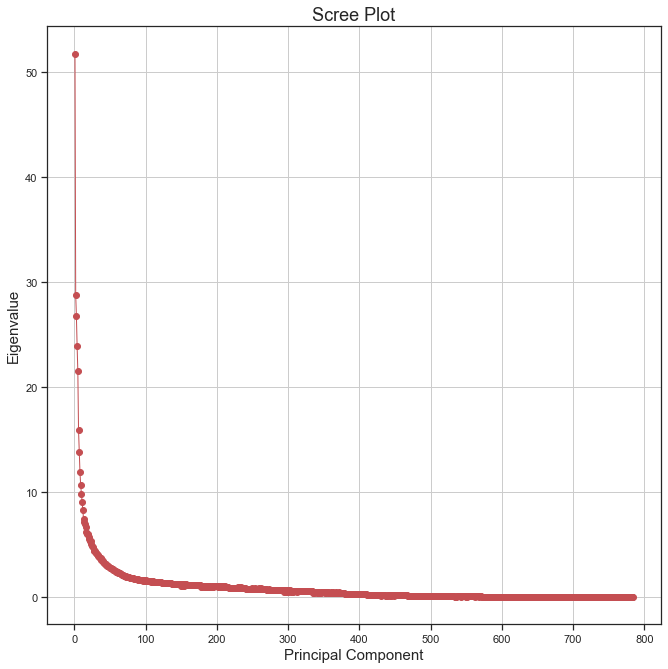

In [46]:
fig = plt.figure(figsize=(11,11))
sing_vals = np.arange(len(X[0])) + 1
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=1)
plt.title('Scree Plot', fontsize = 18)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()
plt.show()

##### Discussion on cut-off
Looking at the above scree plot of the principal components and their corresponding eigen values, it can be observed that with increase in the index of the principal components their corresponding eigen value decreases. Moreover, decrease in the eigen values are very steep for the initial principal components while after certain value they seem to have approximately equal value which can be observed at approximately 370th principal component.

Moreover, similar threshold might also be obtained by plotting the cumulative variance explained by the principal component. Looking at the below plotted graph it can be depicted that the 95% variance of the total data can be explained using the first 373 principal components.

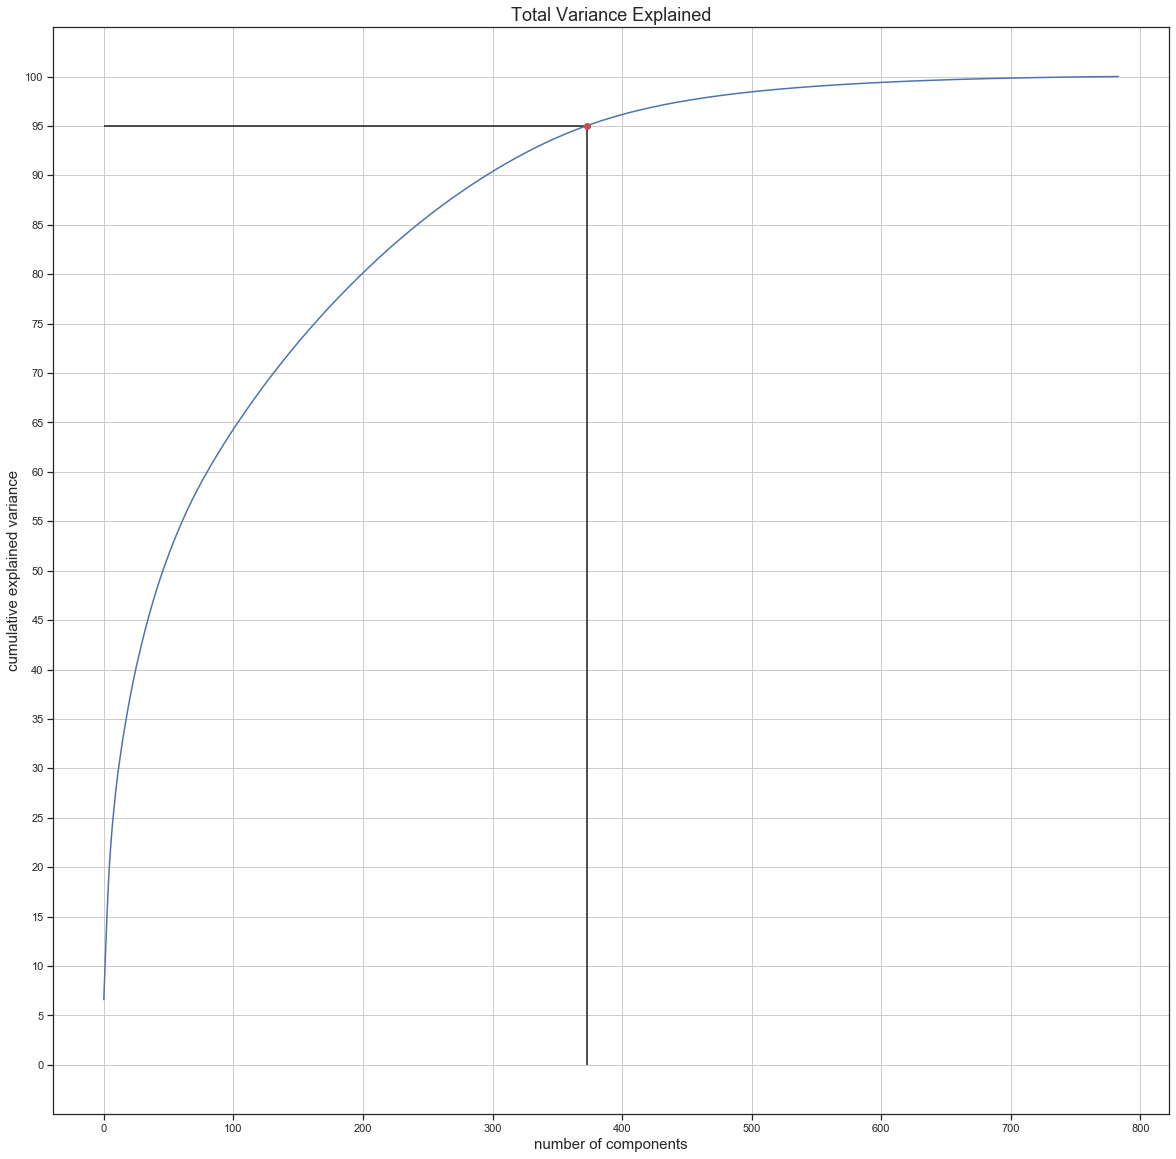

In [47]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
fig = plt.figure(figsize = (20,20))
plt.plot(cum_var_exp)
plt.plot(373,95 , '-ro')
plt.hlines(y = 95, xmin = 0, xmax = 373)
plt.vlines(x = 373, ymin = 0, ymax = 95)
plt.xlabel('number of components',fontsize = 15)
plt.ylabel('cumulative explained variance',fontsize = 15)
plt.title("Total Variance Explained",fontsize = 18)
plt.yticks(np.arange(0,101,5))
plt.grid()
plt.show()

##### 2) Using subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues

In [48]:
mean_vec = np.mean(X_std, axis=0)
c = X_std - mean_vec
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [49]:
eig_pairs.sort()
eig_pairs.reverse()

In [50]:
matrix_w = (eig_pairs[0][1].reshape(784,1))
for i in range(1,20):
    matrix_w = np.hstack((matrix_w , eig_pairs[i][1].reshape(784,1))) 
    
Y = c.dot(matrix_w)

It is difficult to locate the elbow from the scree plot of the 784 eigen value. So, below plotted the scree plot for first 20 eigen value which can be used for analysis.

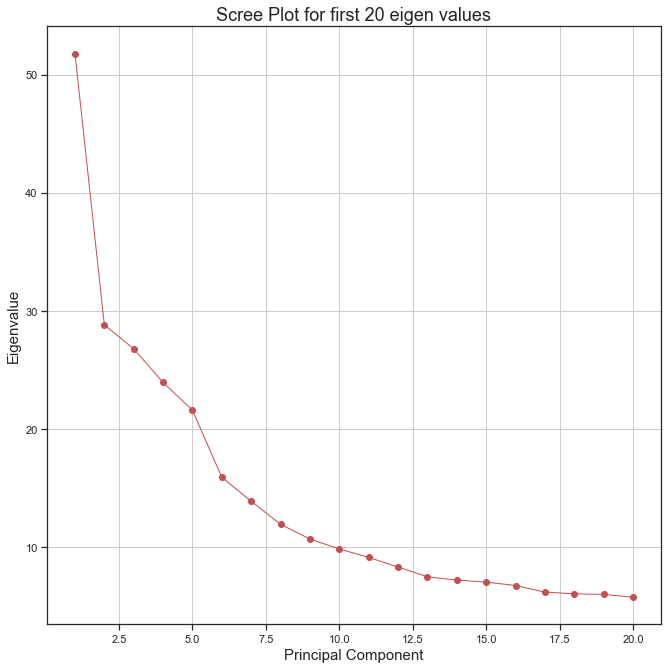

In [51]:
fig = plt.figure(figsize=(11,11))
sing_vals = np.arange(len(X[0])) + 1
plt.plot(sing_vals[0:20], eig_vals[0:20], 'ro-', linewidth=1)
plt.title('Scree Plot for first 20 eigen values', fontsize = 18)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Eigenvalue', fontsize = 15)
plt.grid()
plt.show()

In [52]:
features = []
for i in range(1,21):
    features.append('PC' + str(i))
df_20 = pd.DataFrame(data = Y, columns = features)

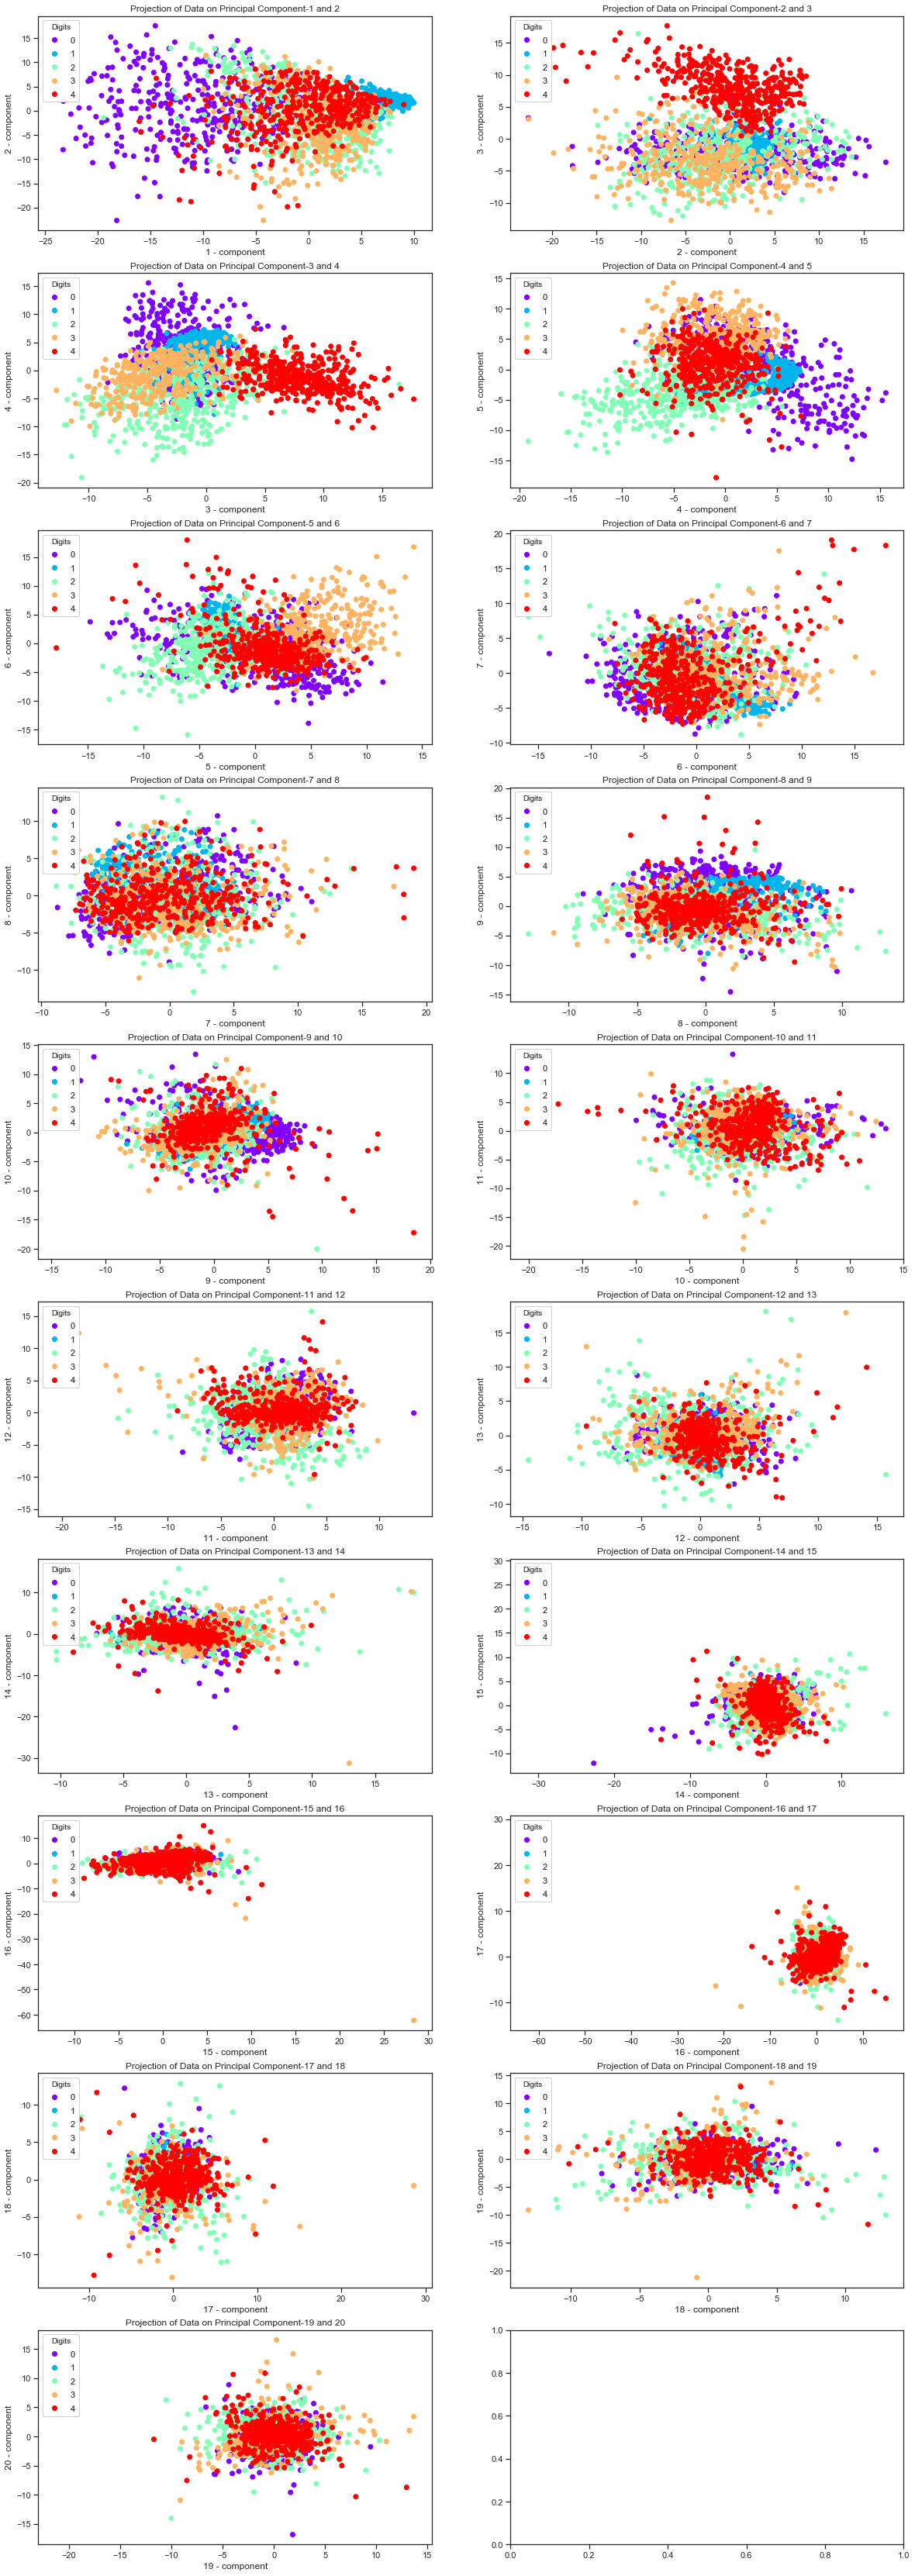

In [53]:
col = 2
row = 10
fig, axs = plt.subplots(row, col, figsize=(20,60))

count = 0
flag = False
for row in range(0, row):
    for column in range(0, col):
        scatter = axs[row,column].scatter(df_20.iloc[:,count], df_20.iloc[:,count+1], c = targets['gnd'], cmap = "rainbow")
        legend1 = axs[row,column].legend(*scatter.legend_elements(prop = 'colors'),
                    loc="upper left", title="Digits")
        axs[row, column].add_artist(legend1)
        axs[row, column].set_xlabel(str(count+1) + ' - component')
        axs[row, column].set_ylabel(str(count+2) + ' - component')
        axs[row, column].set_title("Projection of Data on Principal Component-" + str(count+1) + " and " + str(count+2))
        count += 1
        if(count == 19):
            flag = True
            break;
    if(flag):
        break;

The above plots show the scatter plot of the transformed data on the top 20 principal components corresponding, it can be observed from the range of the variance(range of axis) described by each principal component that variance decreases with an increase in the number of principal components.

Looking at the range of variance explained by principal components it can be seen, the range of variance explained decreases as the eigenvalues corresponding to these principal components decrease. Also, it can be observed from the 5th plot that variance along principal components 13 and 14 drops drastically, this effect can also be seen from scree plotted for the first 20 eigenvectors.

##### 3) Plot two 2-dimensional representations of the data points based on the first vs second principal components and 5th vs 6th displaying the data points of each class with a different color

In [54]:
Y = pd.DataFrame(data = Y)

##### Projecting PCA transformed Data on first and second principal components

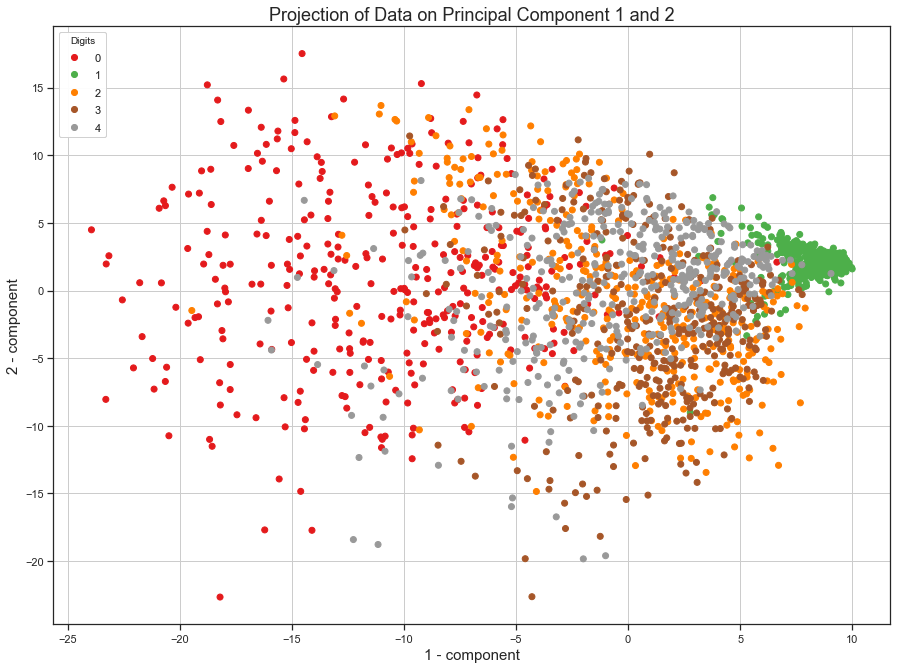

In [55]:
fig, axs = plt.subplots(figsize=(15,11))
count = 0
scatter = axs.scatter(Y.iloc[:,count], Y.iloc[:,count+1], c = targets['gnd'],cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel(str(count+1) + ' - component', fontsize = 15)
axs.set_ylabel(str(count+2) + ' - component', fontsize = 15)
axs.set_title("Projection of Data on Principal Component 1 and 2", fontsize = 18)
axs.grid()

##### Projecting PCA transformed Data on fifth and sixth principal components

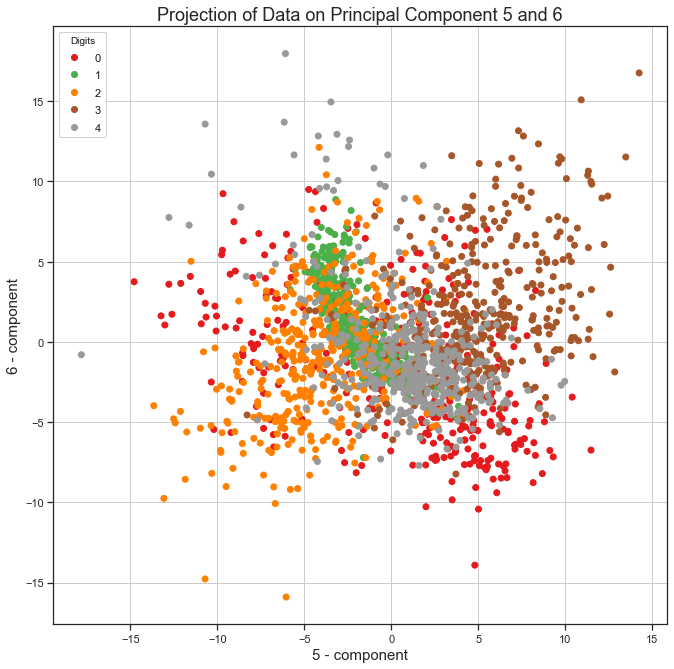

In [56]:
fig, axs = plt.subplots(figsize=(11,11))
count = 4
scatter = axs.scatter(Y.iloc[:,count], Y.iloc[:,count+1], c = targets['gnd'], cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel(str(count+1) + ' - component', fontsize = 15)
axs.set_ylabel(str(count+2) + ' - component', fontsize = 15)
axs.set_title("Projection of Data on Principal Component 5 and 6", fontsize = 18)
axs.grid()

1. From the above plot of the data on first and second principal components and fifth and sixth principal components, it can be visualized from the range of the different principal components that the variance described by the first two principal components is greater than the fifth and sixth components.<br>
2. Classes of the MNIST digit dataset have maximum variance in the first principal components describing 6.6% of the total variance. While the second principal component explains 3.67% of the total variance. <br>
3. The explained variance corresponding principal component(individual) having low eigon-values, decrease as can be understood from the plot.<br>
4. Also, the classes look more separated when projected on principal components 1 and 2 compared to the projection on principal components 5 and 6.

##### 4) Implement (1) PCA and (2) dual PCA with singular value decomposition.

##### 1) PCA

In [57]:
import time
start = time.time()
mean_vec = np.mean(X_std, axis=0)
# Covariance Matrix
c = (X_std - mean_vec)
cov_mat_v = (X_std - mean_vec).T.dot((X_std - mean_vec))
eig_vals_v, eig_vecs_v = np.linalg.eig(cov_mat_v)
eig_pairs_PCA = [(np.abs(eig_vals_v[i]), eig_vecs_v[:,i]) for i in range(len(eig_vals_v))]
eig_pairs_PCA.sort()
eig_pairs_PCA.reverse()

matrix_w_PCA = eig_pairs_PCA[0][1].reshape(784,1)
for i in range(1,20):
    matrix_w_PCA = np.hstack(( matrix_w_PCA ,eig_pairs_PCA[i][1].reshape(784,1)))

# Projection of data
projected_data = (c).dot(matrix_w_PCA)
end = time.time()

# Reconstriction Data
reconstruction_data = c.dot(matrix_w_PCA.dot(matrix_w_PCA.T))
print("Running Time of PCA algorithm is " + str(end - start) + " Seconds")
projected_data

Running Time of PCA algorithm is 1.0287156105041504 Seconds


array([[ -9.97069222,   6.18172201,  -4.99286326, ...,   0.26257488,
         -1.42584762,   1.16252257],
       [-11.41599978,   6.94158705,  -5.06302886, ...,  -0.96317397,
         -1.11655238,  -0.06708945],
       [ -3.69011918,   4.69309729,  -2.9086564 , ...,  -2.65907012,
          0.66109634,   5.12371489],
       ...,
       [  0.34942153,   0.93368106,   8.10744188, ...,   1.28086781,
         -1.19700404,  -1.08146006],
       [  3.11526327,   2.09047425,   6.27251911, ...,   1.30774666,
          0.11716451,  -1.59384718],
       [  5.64409375,  -0.24616663,   4.14018317, ...,  -2.8474039 ,
          1.14882287,   3.39490069]])

##### 2) Dual PCA

In [58]:
import time
start_dual = time.time()
mean_vec = np.mean(X_std, axis=0)
cov_mat_u = (X_std - mean_vec).dot((X_std - mean_vec).T)
eig_vals_u, eig_vecs_u = np.linalg.eigh(cov_mat_u)

#sigma = np.diag(eig_vals_u[0:6]) 
#sigma = np.sqrt(sigma)

eig_pairs_dual = [(np.abs(eig_vals_u[i]), eig_vecs_u[:,i]) for i in range(len(eig_vals_u))]
eig_pairs_dual.sort()
eig_pairs_dual.reverse()

matrix_w_dual = eig_pairs_dual[0][1].reshape(2066,1)
for i in range(1,20):
    matrix_w_dual = np.hstack(( matrix_w_dual ,eig_pairs_dual[i][1].reshape(2066,1)))
    
sigma = []    
for i in range(0,20):
    sigma.append(eig_pairs_dual[i][0])
sigma = np.diag(sigma)
sigma = np.sqrt(sigma)

# Projection on the lower dimension
projected_data = matrix_w_dual.dot(sigma)
end_dual = time.time()

print("Running Time of dual PCA algorithm is " + str(end_dual - start_dual) + " Seconds")
projected_data

Running Time of dual PCA algorithm is 2.47845458984375 Seconds


array([[ 9.97069222, -6.18172201,  4.99286326, ...,  0.26257488,
        -1.42584762,  1.16252257],
       [11.41599978, -6.94158705,  5.06302886, ..., -0.96317397,
        -1.11655238, -0.06708945],
       [ 3.69011918, -4.69309729,  2.9086564 , ..., -2.65907012,
         0.66109634,  5.12371489],
       ...,
       [-0.34942153, -0.93368106, -8.10744188, ...,  1.28086781,
        -1.19700404, -1.08146006],
       [-3.11526327, -2.09047425, -6.27251911, ...,  1.30774666,
         0.11716451, -1.59384718],
       [-5.64409375,  0.24616663, -4.14018317, ..., -2.8474039 ,
         1.14882287,  3.39490069]])

For PCA, we decompose the matrix $X^T*X$ which has $d*d$ dimension where $d = 784$ for MNIST dataset whereas for Dual PCA, we decompose the matrix $X*X^T$ which has $n*n$ dimensions where $n = 2066$ for MNIST dataset.
Decomposition of matrix with dimension $2066*2066$ takes longer time than decomposition of matrix with $784*784*$ dimensions. That is why Dual PCA takes more time than PCA.<br><br>
Which is further being supported by the fact that the execution time of PCA is approximately 1.02 seconds while dual PCA takes around 2.47 seconds.

### 2.2.2 Theoritical Question

#### Prove that PCA is the best linear method for reconstruction (with orthonormal bases).

#### Answer: <br>
$\hat{X}$ is data point in original space and $UU^T\hat{X}$ is reconstruction of projected data on the principal components.

In order to reduce the recunstruction error we need to form an optimization problem and minimize it.
The optimization problem is described as below:<br><br>
\begin{equation*}
\begin{aligned}
& \underset{U}{\text{minimize}}
& & ||\hat{X} - UU^T\hat{X}||_F^{2} \\
& \text{subject to}
& & U^TU = I.
\end{aligned}
\end{equation*}

$||\hat{X} - UU^T\hat{X}||_F^{2}$<br><br>
$= tr((\hat{X} - UU^T\hat{X})^T(\hat{X} - UU^T\hat{X}))$<br><br>
$= tr((\hat{X}^T - \hat{X}^TUU^T)(\hat{X} - UU^T\hat{X}))$<br><br>
$= tr(\hat{X}^T\hat{X} - 2\hat{X}^TUU^T\hat{X} + \hat{X}^TU\underbrace{U^TU}_\text{I}U^T\hat{X})
= tr(\hat{X}^T\hat{X} - \hat{X}^TUU^T\hat{X})$ <br> <br>
$= tr(\hat{X}^T\hat{X}) - tr(\hat{X}^TUU^T\hat{X})$ <br> <br>
$= tr(\hat{X}^T\hat{X}) - tr(\hat{X}\hat{X}^TUU^T)$ <br> <br>
Using Lagrange multiplier, we have: <br>
$\mathcal{L} = tr(\hat{X}^T\hat{X}) - tr(\hat{X}\hat{X}^TUU^T) - tr(\Lambda^T(U^TU - I))$, <br>

where $\Lambda \in \mathbb{R}^{p \times p}$ is a diagonal matrix $diag([\lambda_1,...,\lambda_p]^T)$ containing the Lagrange multipliers. Equating the derivative of Lagrangian to zero gives:<br>

$
\mathbb{R}^{d\times p} \ni \frac{\partial \mathcal{L}}{\partial U} = 2\hat{X}\hat{X}^TU - 2U\Lambda = 0$ <br> <br>
$\implies \hat{X}\hat{X}^TU = U\Lambda,
\implies SU = U\Lambda$ <br> <br>

This is the eigen value problem for the covariance matrix S. We had same eigen value problem in PCA.

PCA subspace is the best linear projection in terms of reconstruction error as reconstruction error is minimized when maximum variance are captured along the data points. In other words, PCA has the least squared error in reconstruction.

## 2.3 Fisher Discriminant Analysis (FDA)

### 2.3.1 Practical Question

#### 2.3.1.1 Using LDA for dimensionality reduction

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
LDA = LinearDiscriminantAnalysis(n_components = 20)
LDA_data = LDA.fit_transform(X, y)

C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(784, 5 - 1) = 4 components.
  ChangedBehaviorWarning)
C:\Users\Rfrs8929\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [61]:
lda_dataframe = pd.DataFrame(data = LDA_data, columns = ['d1', 'd2', 'd3', 'd4'])

In [62]:
finalDf_LDA = pd.concat([lda_dataframe, targets], axis = 1)

##### Scatter plot of the projected data in 4 directions

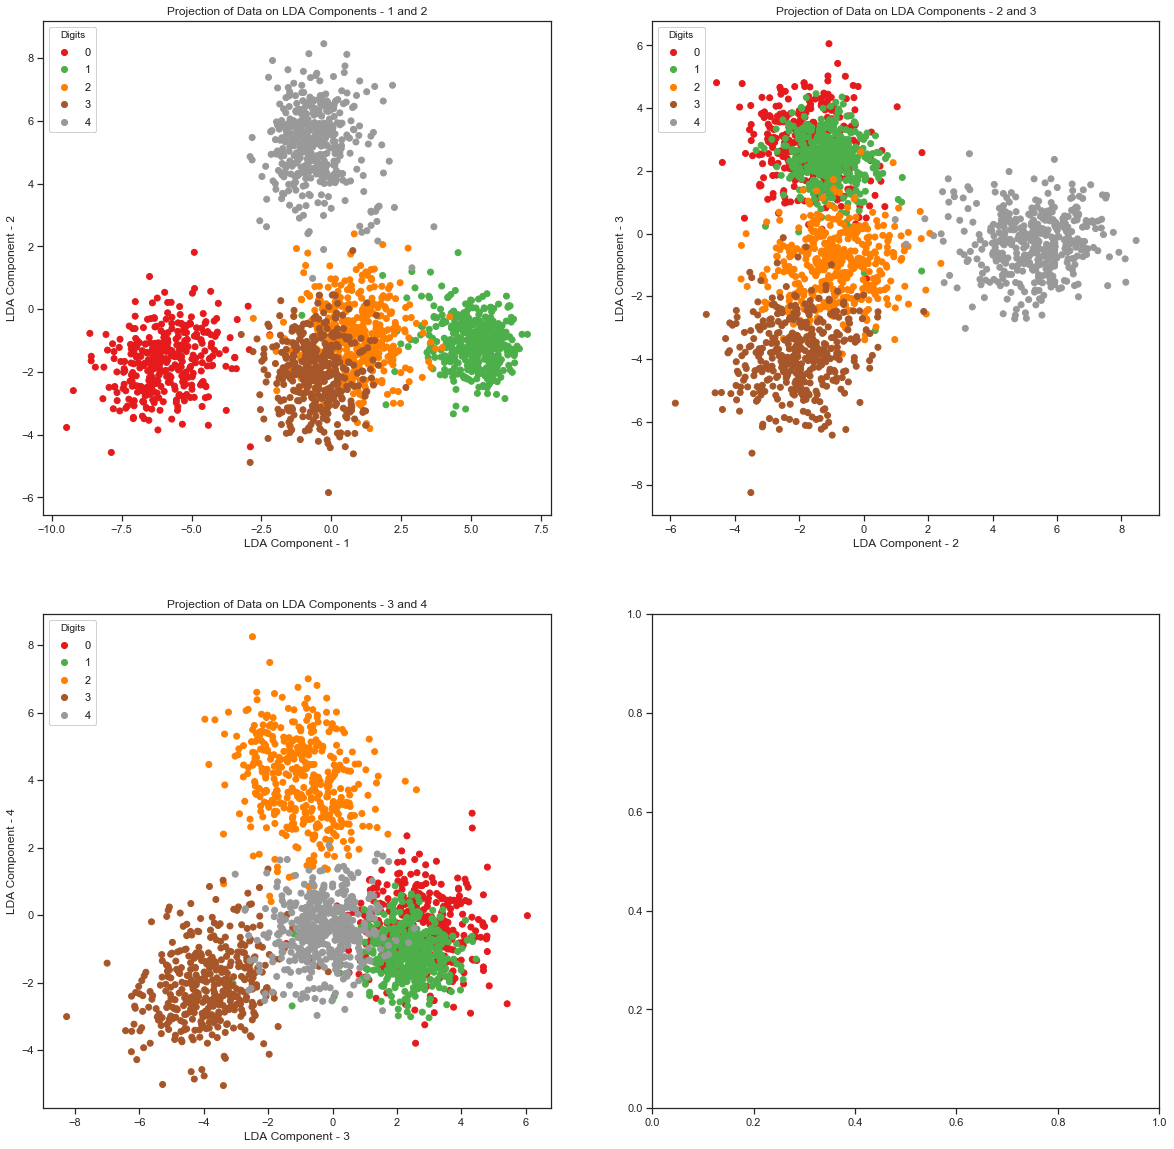

In [63]:
col = 2
row = 2
fig, axs = plt.subplots(row, col, figsize=(20,20))

count = 0
flag = False
for row in range(0, row):
    for column in range(0, col):
        scatter = axs[row,column].scatter(lda_dataframe.iloc[:,count], lda_dataframe.iloc[:,count+1], c = targets['gnd'], cmap = 'Set1')
        legend1 = axs[row,column].legend(*scatter.legend_elements(prop = 'colors'),
                    loc="upper left", title="Digits")
        axs[row, column].add_artist(legend1)
        axs[row, column].set_xlabel("LDA Component - " + str(count+1))
        axs[row, column].set_ylabel("LDA Component - " + str(count+2))
        axs[row, column].set_title("Projection of Data on LDA Components - " + str(count+1) + " and " + str(count+2))    
        count += 1
        if(count == 3):
            flag = True
            break;
    if(flag):
        break;

It can be visualised from the above plots that different classes can be distinct in different directions. Following are the different directions responsible for different classes;
 - Direction 1 : This direction is responsible for the separation of the digit 0 and digit 1 as it can be observed from cluster spread along the x axis of the first graph.
 - Direction 2 : if projected data on direction 2 then except digit 4 all the other classes are collapsed near to each other. So, only digit 2 can be classified along direction 2.
 - Direction 3 : Direction 3 separates the MNIST digit 3 when projected on it
 - Direction 4 : when data are projected along direction 4 then digit 2 class seems to have separability from rest of the class. 

#### Q2.3.1.2 Compare the results of the LDA with the results obtained using PCA.

It can be visualized from the above plots, Projection on principal component 1 and principal component 2 provide good visualization of different classes, but LDA outperforms PCA when it comes to comprehending the separability of classes in lower dimensions. Comparing these results of PCA and LDA it can be said that LDA tries to attain maximum separability of classes across different directions while principal components in PCA are in the direction of the maximum variance.

### 2.3.2 Theoretical Question

#### We can consider the total scatter as the summation of the within and between scatters: $\mathbf{S_T = S_W + S_B \implies\ S_B = S_T - S_W}$. By substituting this into the Fisher criterion, the FDA optimization can be slightly modified to:

#### Answer: <br><br>
Here $d$ is the dimensions of datapoints and $p$ is the dimension of projection space
The optimization equation is equivalent to: <br> <br>
\begin{equation*}
\begin{aligned}
& \underset{U}{\text{maximize}}
& & tr(U^TS_TU) \\
& \text{subject to}
& & U^TS_WU = I.
\end{aligned}
\end{equation*}
<br> <br>
Using Lagrange multiplier, we have: <br> <br>
$\mathcal{L} = tr(U^TS_TU) - tr(\Lambda^T(U^TS_WU - I))$ <br> <br>
where $\Lambda \in \mathbb{R}^{d \times d}$ is a diagonal entries are the Lagrange multipliers. Equating the derivative of $\mathcal{L}$ to zero gives: <br> <br>
$\mathbb{R}^{d \times p} \ni \frac{\partial L}{\partial U} = 2S_TU - 2S_WU\Lambda = 0$ <br> <br>
$\implies 2S_TU = 2S_WU\Lambda$ <br> <br>
$\implies S_TU = S_WU\Lambda$ <br> <br>
$\implies S_W^{-1}S_TU = U\Lambda$ <br> <br>

Which is a generalized eigenvalue problem ($S_T,S_W$). The columns of U are the eigenvectors sorted by largest to smallest eigenvalues (because the optimization is maximization) and the diagonal entries of Λ are the corresponding eigenvalues. The columns of U are referred to as the Fisher directions or Fisher axes.

##### Comparision of PCA and LDA
The FDA directions can be obtained by the generalized eigenvalue problem ($\mathbf{S_T}$\,$\mathbf{S_W}$\). By comparing the equations, it shows that PCA captures the orthonormal directions with the maximum variance of data. However, the FDA has the same goal but also it requires the manipulated directions to be orthonormal. This manipulation is done by the within scatter which makes sense because the within scatters make use of the class labels. This comparison gives a hint for the connection between PCA and FDA.
From question 2 in a practical question, it is clearly seen that PCA intermingles the classes. There is not a cut point for the dimensions. LDA gives good clear cut dimensions since it considers labels in the data. Suppose there are two different clusters with opposite labels, but still they are placed very near to each other. Most of the data variation in the direction of these clusters. These clusters would be projected onto the direction of the greatest variety of data and it results in the formation of a single cluster of data. So PCA mixes up the clusters without considering the labels. FDA projects the data onto a direction that is orthogonal to the direction of the greatest variation of the data. This direction is in the least variation of the data. These two clusters would then be nearly perfectly separated from each other because of taking into account of their labels.

### Reference

1) B. Ghojogh, M. N. Samad, S. A. Mashhadi, T. Kapoor, W. Ali, F. Karray and M. Crowley, "Feature Selection and Feature       Extraction in Pattern Analysis: A Literature Review", arXiv:1905.02845v1, 7 May 2019<br><br>
2) B. Ghojogh,M. Crowley, "Unsupervised and Supervised Principal Component Analysis: Tutorial", arXiv:1906.03148v1, 1 Jun 2019<br><br>
3) B. Ghojogh, F. Karray and M. Crowley, "Fisher and Kernel Fisher Discriminant Analysis: Tutorial", arXiv:1906.09436v1, 22 Jun 2019

# Question 3 : Nonlinear Dimensionality Reduction

## 3.1 Dataset

In [64]:
import time
variables = []
for i in range(1,785):
    variables.append('fea.' + str(i))
numbers = pd.read_csv("DataB.csv", usecols = variables)
targets = pd.read_csv("DataB.csv", usecols = ['gnd'])
X = numbers.values
y = targets.values

## 3.2 Practical Questions

### 3.2.1 Different embedding techniques

#### Kernel PCA

In [65]:
from sklearn.decomposition import KernelPCA
start_ker = time.time()
kernel_PCA = KernelPCA(n_components = 2, kernel = "rbf", random_state = 42)
transformed_PCA = kernel_PCA.fit_transform(X)
end_ker = time.time()
print("Running Time of kernal PCA algorithm is " + str(end_ker - start_ker) + " Seconds")

Running Time of kernal PCA algorithm is 2.1530449390411377 Seconds


In [66]:
kernel_PCA_dataframe = pd.DataFrame(data = transformed_PCA, columns = ['PC1', 'PC2'])
finalDf_kernel_PCA = pd.concat([kernel_PCA_dataframe, targets], axis = 1)

#### Isomap

In [67]:
from sklearn.manifold import Isomap

In [68]:
start_iso = time.time()
isomap = Isomap(n_components = 2)
transformed_isomap = isomap.fit_transform(X)
end_iso = time.time()
print("Running Time of Isomap algorithm is " + str(end_iso - start_iso) + " Seconds")

Running Time of Isomap algorithm is 22.166784524917603 Seconds


In [69]:
isomap_dataframe = pd.DataFrame(data = transformed_isomap, columns = ['PC1', 'PC2'])
finalDf_isomap = pd.concat([isomap_dataframe, targets], axis = 1)

#### LLE

In [70]:
from sklearn.manifold import LocallyLinearEmbedding

In [71]:
start_LLE = time.time()
LLE = LocallyLinearEmbedding(n_components = 2, random_state = 42)
transformed_LLE = LLE.fit_transform(X)
end_LLE = time.time()
print("Running Time of LLE algorithm is " + str(end_LLE - start_LLE) + " Seconds")

Running Time of LLE algorithm is 17.956815004348755 Seconds


In [72]:
LLE_dataframe = pd.DataFrame(data = transformed_LLE, columns = ['PC1', 'PC2'])
finalDf_LLE = pd.concat([LLE_dataframe, targets], axis = 1)

#### Laplacian Eigenmap

In [73]:
from sklearn.manifold import SpectralEmbedding

In [74]:
start_lap = time.time()
laplacian = SpectralEmbedding(n_components = 2, random_state = 42)
transformed_laplacian = laplacian.fit_transform(X)
end_lap = time.time()
print("Running Time of Laplacian Eigenmap algorithm is " + str(end_lap - start_lap) + " Seconds")

Running Time of Laplacian Eigenmap algorithm is 19.925101280212402 Seconds


In [75]:
laplacian_dataframe = pd.DataFrame(data = transformed_laplacian, columns = ['PC1', 'PC2'])
finalDf_laplacian = pd.concat([laplacian_dataframe, targets], axis = 1)

####  t-SNE

In [76]:
from sklearn.manifold import TSNE

In [77]:
start_tsne = time.time()
tsne = TSNE(n_components = 2, random_state = 42)
transformed_tsne = tsne.fit_transform(X)
end_tsne = time.time()
print("Running Time of t-sne algorithm is " + str(end_tsne - start_tsne) + " Seconds")

Running Time of t-sne algorithm is 54.31389141082764 Seconds


In [78]:
tsne_dataframe = pd.DataFrame(data = transformed_tsne, columns = ['PC1', 'PC2'])
finalDf_tsne = pd.concat([tsne_dataframe, targets], axis = 1)

### 3.2.2 Plot of the Different Methods 

#### Kernel PCA

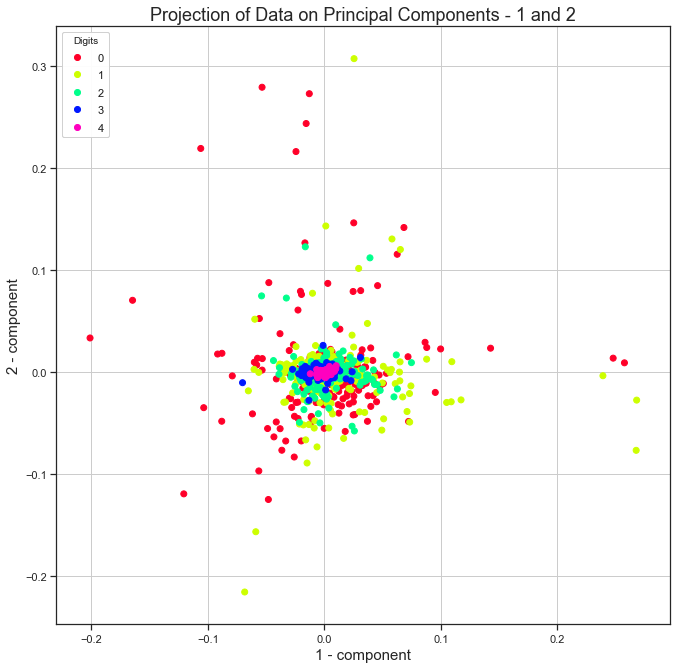

In [79]:
fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(finalDf_kernel_PCA.iloc[:,0], finalDf_kernel_PCA.iloc[:,1], c = finalDf_kernel_PCA.iloc[:,2], cmap = 'gist_rainbow')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel(str(1) + ' - component', fontsize = 15)
axs.set_ylabel(str(2) + ' - component', fontsize = 15)
axs.set_title("Projection of Data on Principal Components - 1 and 2", fontsize = 18)
axs.grid()

Kernel PCA is using RBF kernel for transforming the data. It can be seen that all the digit classes of MNIST dataset are bunched together when projected on the first two principal components and not able to differentiate any classes. It would be because of the kernel used. Radial Basis Function might not be able to transform the data linearly in the higher dimensional space which is the need for the linear method such as PCA.

#### Isomap

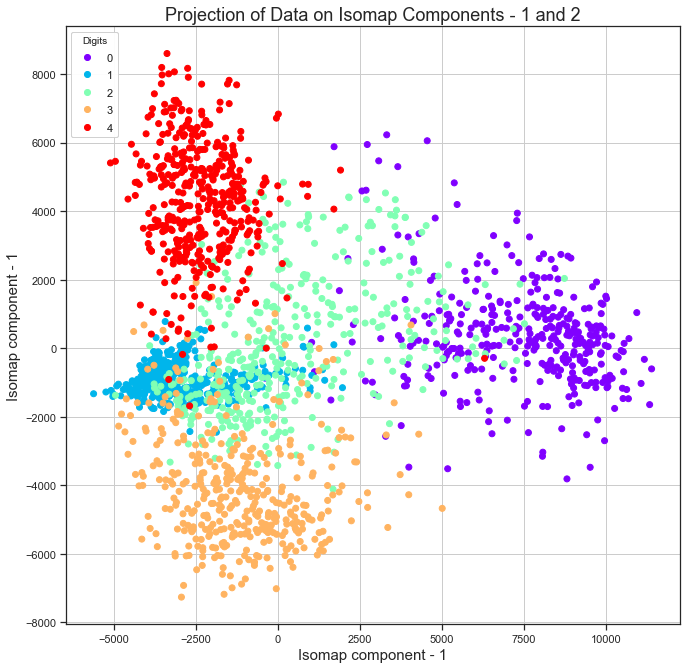

In [80]:
fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(finalDf_isomap.iloc[:,0], finalDf_isomap.iloc[:,1], c = finalDf_isomap.iloc[:,2], cmap = 'rainbow')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel("Isomap component - 1", fontsize = 15)
axs.set_ylabel("Isomap component - 1", fontsize = 15)
axs.set_title("Projection of Data on Isomap Components - 1 and 2", fontsize = 18)
axs.grid()

Isomap uses KNN graph(k = 5 for default case) and kernel of MDS method with geodesic distance resulting in fitting locally. From the above projection, it can be depicted that the Isomap is able to unfold the manifold effectively and gives better separability among the 0,3 and 4 digit classes. Moreover, the shape of the projected data looks like an octopus which might be because of the K nearest neighbor graph.

#### LLE

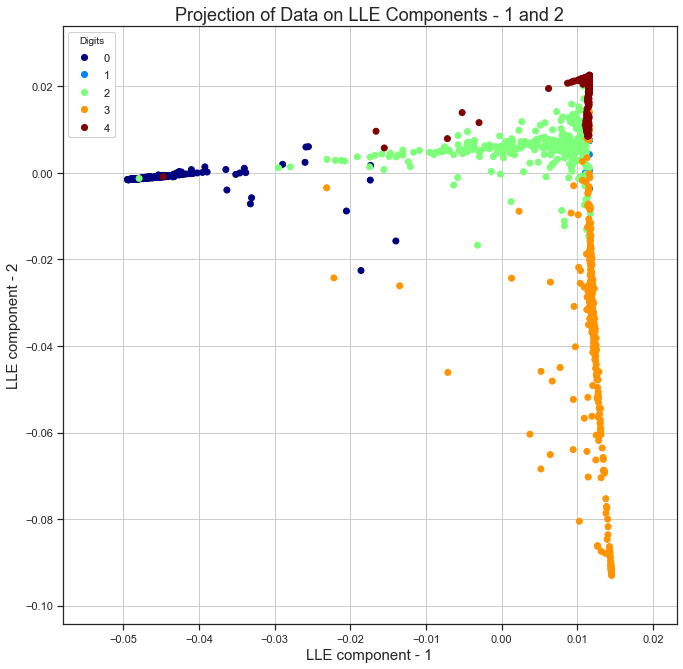

In [81]:
fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(finalDf_LLE.iloc[:,0], finalDf_LLE.iloc[:,1], c = finalDf_LLE.iloc[:,2], cmap = 'jet')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel("LLE component - 1", fontsize = 15)
axs.set_ylabel("LLE component - 2", fontsize = 15)
axs.set_title("Projection of Data on LLE Components - 1 and 2", fontsize = 18)
axs.grid()

- The result of LLE is almost symmetric it can be attributed as optimization of uses the constraint of unit covariance. (It assumes the dense distribution of data points in original space, and does not perform well in presence of outliers in the original data)
- Classes 0,2,3 and 4 looks well separated from each other, whereas there is substantial overlap among class 1 and classes 2,3 and 4.
- LLE is sensitive to outliers and noise. Datasets have a varying density and it is not always possible to have a smooth manifold. In these cases, LLE gives a poor result.
(Reference: https://blog.paperspace.com/dimension-reduction-with-lle/)

#### Laplacian Eigenmap

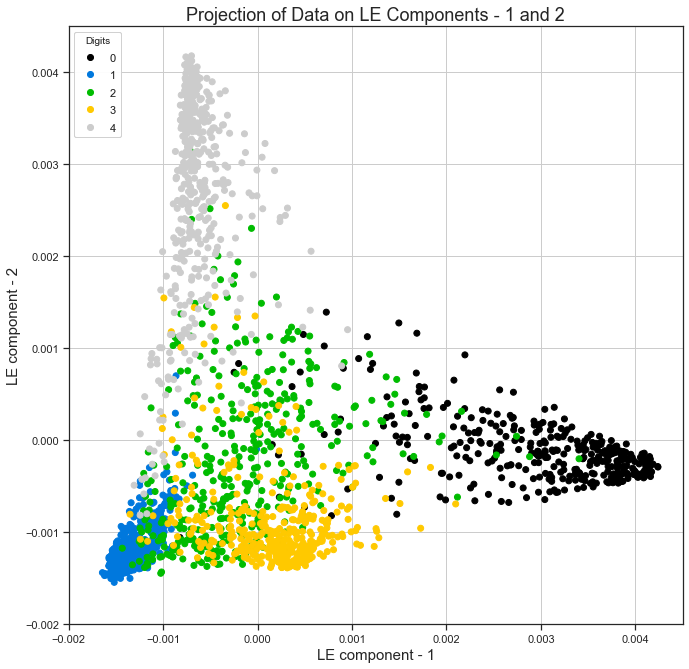

In [82]:
fig, axs = plt.subplots(figsize=(11,11))
scatter = axs.scatter(finalDf_laplacian.iloc[:,0], finalDf_laplacian.iloc[:,1], c = finalDf_laplacian.iloc[:,2], cmap = 'nipy_spectral')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel("LE component - 1", fontsize = 15)
axs.set_ylabel("LE component - 2", fontsize = 15)
axs.set_xlim(-0.002, 0.0045)
axs.set_ylim(-0.002, 0.0045)
axs.set_title("Projection of Data on LE Components - 1 and 2", fontsize = 18)
axs.grid()

From the above plot and theoretical background on Laplacian eigenmaps, we have the following observations :
   - Datapoints sharing similar features look very close to each other in the lower dimensional space, this can be attributed to one-directional cost function used for the Laplacian eigenmaps algorithm, which penalizes cost if we do not maintain the high similarity(in projected space) among the most similar points(from the original space).
   - The cluster of data looks good and compact.
   - it can be visualized that classes 0,3 and 4 looks separated from the rest of the classes.

#### t-SNE

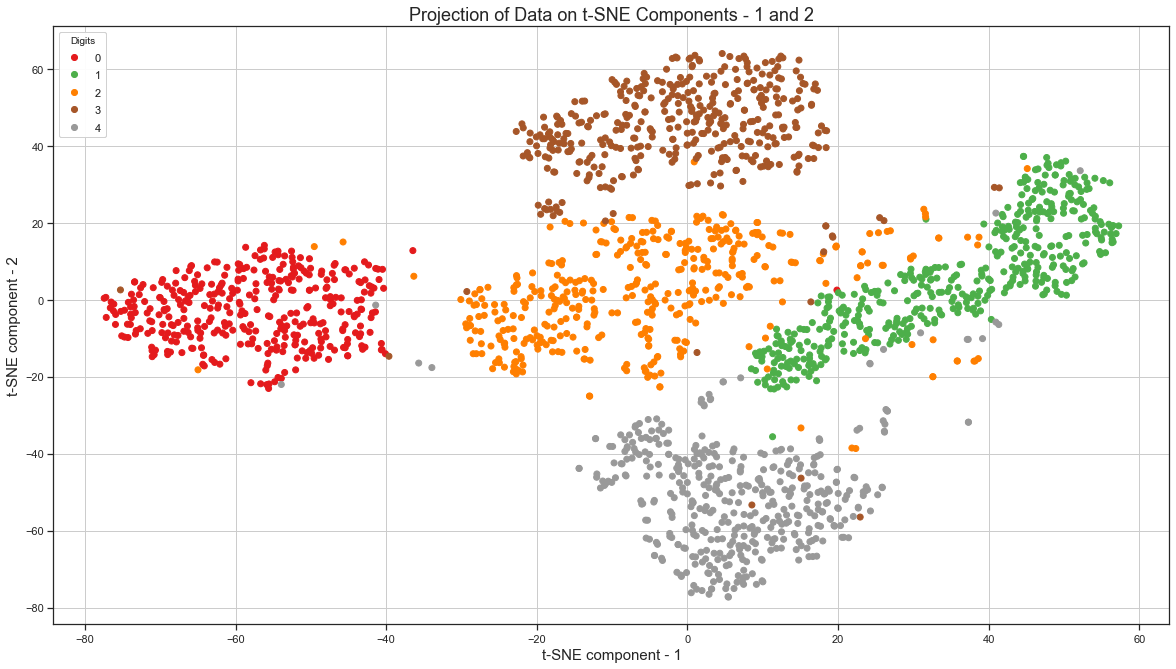

In [83]:
fig, axs = plt.subplots(figsize=(20,11))
scatter = axs.scatter(finalDf_tsne.iloc[:,0], finalDf_tsne.iloc[:,1], c = finalDf_tsne.iloc[:,2], cmap = 'Set1')
legend1 = axs.legend(*scatter.legend_elements(prop = 'colors'),
            loc="upper left", title="Digits")
axs.add_artist(legend1)
axs.set_xlabel("t-SNE component - 1", fontsize = 15)
axs.set_ylabel("t-SNE component - 2", fontsize = 15)
axs.set_title("Projection of Data on t-SNE Components - 1 and 2", fontsize = 18)
axs.grid()

As expected, t-SNE separates classes well, following are the observations from the above plot and theory :
   - Most Classes form spherical/ t-distribution patches, which can be attributed to the use of t distribution in the theoretical framework for t-SNE.
   - Classes are separated well, i.e. there is a significant distance among the patches for different classes, thus it can be understood as t-SNE deals with the probabilities and also these are further multiplied(probabilities) by a factor of 4.
   - There is very little overlap shared among different categories.
   - all classes; 0,1,2,3,4 looks well separated in t-SNE transformed 2-d plot with very few data points outside the class patches.

#### Comparison among Manifold methods:

1. It can be observed that similar digits almost fall in the same cluster and most of the manifold learning methods such as isomap, LLE, LE and t-SNE are able to differentiate between different classes of MNIST data except RBF kernel-based Kernel PCA. This can be because of the fact that the kernel used by KPCA(here in this question) is Radial Basis function and is independent of data features, whereas the rest of techniques used here use a data-driven kernel and hence are comparatively more accurate for visualizing different classes present in the data.<br><br>

2. Empirically, we have seen that the embedding of Isomap usually has several legs as in octopus. Two of the octopus legs can be seen in Figure, while for other datasets we might have more number of legs. The result of LLE is almost symmetric (symmetric triangle or square, etc) because in the optimization of LLE because of the constraint which is unit covariance.<br><br>

3. The above-described methods can be compared to the time taken by them. From time calculation performed above, it can be seen that KPCA(2.15 seconds) takes almost one-tenth of time compared to the time taken by isomap (22.16 seconds), LLE (17.95 seconds), LE (19.92 seconds). Furthermore, t-SNE(54.31 seconds) takes almost as much as thrice time compared to isomap, LLE and LE.(Time taken by ISOMAP and LLE depends on number of neighbors, here these algorithms are performed using  k = 5 )<br><br>

4. __t-SNE vs Kernel PCA:__ 
 - looking at the above plot for t-SNE and kernel PCA, it can be said that the t-SNE is able to differentiate among the different classes and able to maintain the distance between the class cluster of data well as t-SNE uses T distribution. On the contrary, KPCA does not seem to be able to distinguish the classes and exhibit a lot of overlap for this dataset.
 - Time taken by t-SNE is 17.55 seconds which is substantially more than time taken by KPCA that is 0.77 seconds, as t-SNE is based on iteratively keeping data points together on lower dimension space which are together in higher dimension(by converting pairwise distances to probabilities) and does not have a convex cost function, Whereas KPCA has an optimized solution (based on the use of Kernel).
    
5.__Trade off while deciding the best methods:__
  1. Time: Time taken by these algorithms is different if computational power is limited, a method which takes less time to execute would be preferred. Therefore in such a scenario, Isomap, LE and LLE would be better choices.
  2. Visualization / seprability: The best visualization in terms of separability is provided by t-SNE and hence, in situations where it is more important to visualize irrespective of the computational time taken by the algorithm, t-SNE would be the most preferred method.
